In [1]:
import pandas as pd
import os, sys
import glob

In [2]:
output_dir = "/scratch/tweber/DATA/MC_DATA/DEMULTIPLEXING_POOLS/FINAL_RESULTS/without_sanity_check"

In [3]:
sample_raw = "2023-11-09-HW3YVAFX5/LanexHGSVCpool2NEW"

In [4]:


l_samples = [
# "2021-07-29-HWYJ2AFX2/HGSVCxpool1x01",
# "2021-08-03-H22VWAFX3/HGSVCxpool2x02",
# "2021-08-03-H22VWAFX3/HGSVCxpool3x01",
# "2023-11-09-HW5NFAFX5/HGSVCpool1NEW",
# "2023-11-09-HW3YVAFX5/LanexHGSVCpool2NEW",
# "2024-01-29-H33YJAFX7/LanexHGSVCpool2NEW96wellUVLED"
#"2024-01-30-AACT75KM5/HGSVCpool1NEWp2"
 #"2024-01-30-AACT75KM5/HGSVCpool3NEWp2"
  sample_raw  
]

sample = l_samples[0].split("/")[-1]
sample_for_savedir = l_samples[0].replace("/", "--")
sample_for_savedir_lite = sample_for_savedir.split("--")[1]

print(sample_for_savedir)

#l_samples = [
#"2021-08-03-H22VWAFX3/HGSVCxpool3x01"
#"2021-08-03-H22VWAFX3/HGSVCxpool3x01"
#"2021-07-29-HWYJ2AFX2/HGSVCxpool1x01"
#"2023-11-09-HW3YVAFX5/LanexHGSVCpool2NEW"
#"2023-11-09-HW5NFAFX5/HGSVCpool1NEW"
#"2021-05-12-HMCNFAFX2/GM18989x01",
#"2021-04-21-HMNJLAFX2/GM19320x01",
#"2021-05-12-HMCNFAFX2/GM19331x01",
#"2021-05-31-HNLFLAFX2/GM19836x01",
#"2021-05-31-HNLFLAFX2/GM20355x01",
#"2021-05-06-HN2VJAFX2/GM21487x01",
#"2021-04-21-HMNJLAFX2/HG02282x03",
#"2021-05-06-HN2VJAFX2/HG02554x01",
#"2021-05-31-HNLFLAFX2/HG02666x02",
#"2021-04-21-HMNJLAFX2/HG02769x01",
#"2021-05-06-HN2VJAFX2/HG02953x01",
#"2021-05-12-HMCNFAFX2/HG03452x02",
#]

year = list(set([e.split("-")[0] for e in l_samples]))[0]
#index = "PE20" if year == "2021" or year == "2022" else "iTRU"
os.makedirs(f"{output_dir}/{sample_for_savedir}", exist_ok=True)

2023-11-09-HW3YVAFX5--LanexHGSVCpool2NEW


In [5]:
# Glob pattern to find .vcf files for the given sample
vcf_files = glob.glob(f"/scratch/tweber/DATA/MC_DATA/DEMULTIPLEXING_POOLS/SNP_DISCOVERY/{sample}/*.vcf")

# Initialize the index variable
index = None

# Check if the list of files is not empty
if vcf_files:
    # Retrieve the first file in the list
    first_file = vcf_files[0]
    
    # Check if "PE20" or "iTRU" is in the filename of the first file
    if "PE20" in first_file:
        index = "PE20"
    elif "iTRU" in first_file:
        index = "iTRU"

# Print the index value or a message if no index was found
if index:
    print(f"Index found: {index}")
else:
    print("No PE20 or iTRU index found in the first file.")

Index found: iTRU


In [6]:
ref_path = f"/scratch/tweber/DATA/MC_DATA/DEMULTIPLEXING_POOLS/BCFTOOLS_CONCAT_TAB/{sample}/merge.txt.gz"
#ref_path = "/scratch/tweber/DATA/MC_DATA/DEMULTIPLEXING_POOLS/BCFTOOLS_CONCAT_TAB/HGSVCxpool3x01/merge.txt.gz"
# ref_path = "/scratch/tweber/DATA/MC_DATA/DEMULTIPLEXING_POOLS/BCFTOOLS_CONCAT_TAB/PSEUDOPOOL/merge.txt.gz"
ref = pd.read_csv(ref_path, compression="gzip", sep="\t",)
ref["GlobalSample"] = ref_path.split("/")[-2]

if "with_sanity_check" in output_dir:

    sanity_check_path = "/scratch/tweber/DATA/MC_DATA/DEMULTIPLEXING_POOLS/BCFTOOLS_CONCAT_TAB/Random_for_sanity_check/merge.txt.gz"
    sanity_check_ref = pd.read_csv(sanity_check_path, compression="gzip", sep="\t")
    sanity_check_ref["GlobalSample"] = sanity_check_path.split("/")[-2]

    ref = pd.concat([ref, sanity_check_ref])

ref["ID"] = "chr" + ref["ID"]
ref

,ID,AC,AF,SAMPLE,GlobalSample
0,chr10:11890:C:T,5,0.000781,HG00139,LanexHGSVCpool2NEW
1,chr10:13061:G:A,299,0.046690,HG00139,LanexHGSVCpool2NEW
2,chr10:49904:C:T,97,0.015147,HG00139,LanexHGSVCpool2NEW
3,chr10:64582:C:A,124,0.019363,HG00139,LanexHGSVCpool2NEW
4,chr10:66015:A:G,304,0.047470,HG00139,LanexHGSVCpool2NEW
...,...,...,...,...,...
12936207,chrX:155960885:G:A,32,0.004997,NA20885,LanexHGSVCpool2NEW
12936208,chrX:156009266:T:G,278,0.043410,NA20885,LanexHGSVCpool2NEW
12936209,chrX:156020552:C:G,22,0.003435,NA20885,LanexHGSVCpool2NEW
12936210,chrX:156021485:G:A,23,0.003592,NA20885,LanexHGSVCpool2NEW


In [7]:
ref['unique_sample_count'] = ref.groupby('ID')['SAMPLE'].transform('nunique')
ref = ref[ref['unique_sample_count'] == 1]
#ref

In [8]:
ref

,ID,AC,AF,SAMPLE,GlobalSample,unique_sample_count
0,chr10:11890:C:T,5,0.000781,HG00139,LanexHGSVCpool2NEW,1
12,chr10:82414:C:A,15,0.002342,HG00139,LanexHGSVCpool2NEW,1
20,chr10:102663:C:T,7,0.001093,HG00139,LanexHGSVCpool2NEW,1
23,chr10:119207:C:T,8,0.001249,HG00139,LanexHGSVCpool2NEW,1
24,chr10:135954:G:A,10,0.001562,HG00139,LanexHGSVCpool2NEW,1
...,...,...,...,...,...,...
12936205,chrX:155895366:G:A,9,0.001405,NA20885,LanexHGSVCpool2NEW,1
12936206,chrX:155903957:A:C,30,0.004685,NA20885,LanexHGSVCpool2NEW,1
12936209,chrX:156020552:C:G,22,0.003435,NA20885,LanexHGSVCpool2NEW,1
12936210,chrX:156021485:G:A,23,0.003592,NA20885,LanexHGSVCpool2NEW,1


In [9]:
ref.groupby(["GlobalSample", "SAMPLE"])["ID"].count()


GlobalSample        SAMPLE 
LanexHGSVCpool2NEW  HG00139     77926
                    HG00325     79260
                    HG00349     85351
                    HG00360     80062
                    HG00607     91606
                    HG00634     86565
                    HG01474     90417
                    HG01494    109368
                    HG01578     82077
                    HG01789     75673
                    HG01851     81779
                    HG01967     70827
                    HG02079     91634
                    HG02184     84318
                    HG02224     88103
                    HG02307    338746
                    HG02318    363101
                    HG02332    321754
                    HG02410     78749
                    HG02522     95766
                    HG02554    316939
                    HG02938    343351
                    HG03439    376163
                    HG03539    354158
                    HG03687    105465
                    HG

In [10]:
ref_count = ref.groupby(["GlobalSample", "SAMPLE"])["ID"].count().reset_index()
ref_count.to_csv(f"{output_dir}/{sample_for_savedir}/reference_file_SNP_counts.tsv", sep="\t")
ref_count.head()


,GlobalSample,SAMPLE,ID
0,LanexHGSVCpool2NEW,HG00139,77926
1,LanexHGSVCpool2NEW,HG00325,79260
2,LanexHGSVCpool2NEW,HG00349,85351
3,LanexHGSVCpool2NEW,HG00360,80062
4,LanexHGSVCpool2NEW,HG00607,91606


In [11]:
#sanity_check_ref.SAMPLE.unique()

In [12]:
import glob
final_vcf = list()
for vcf_input in glob.glob(f"/scratch/tweber/DATA/MC_DATA/DEMULTIPLEXING_POOLS/SNP_DISCOVERY/{sample}/*.vcf"):
    cell_line = vcf_input.split("/")[-1].split("_")[0].replace(".vcf", "")
    vcf = pd.read_csv(vcf_input, skiprows=255, sep="\t")

    vcf["cell_line"] = cell_line
#    print(vcf)
    vcf["ID"] = vcf["#CHROM"] + ":" + vcf["POS"].astype(str) + ":" + vcf["REF"]+ ":"  + vcf["ALT"]
#    print(vcf_input)
#    print(cell_line.split(f"{index}")[0])
    vcf = vcf.drop([cell_line.split(f"{index}")[0]], axis=1)
#    vcf = vcf.drop(["HGSVCpool2iTRUE5"], axis=1)

#    print(vcf)
    final_vcf.append(vcf)
final_vcf = pd.concat(final_vcf)
final_vcf.to_csv(f"{output_dir}/{sample_for_savedir}/full_set_of_SNPs_called.tsv.gz", sep="\t", compression="gzip")

final_vcf

/tmp/ipykernel_4009051/825265558.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_vcf = pd.concat(final_vcf)


,#CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,cell_line
0,chr1,2522876,chr1:2522876:A:G,A,G,41.926900,.,AB=0;ABP=0;AC=2;AF=1;AN=2;AO=2;CIGAR=1X;DP=2;D...,GT:DP:AD:RO:QR:AO:QA,LanexHGSVCpool2NEWiTRU1A38
1,chr1,2522937,chr1:2522937:A:G,A,G,49.650700,.,AB=0;ABP=0;AC=2;AF=1;AN=2;AO=2;CIGAR=1X;DP=2;D...,GT:DP:AD:RO:QR:AO:QA,LanexHGSVCpool2NEWiTRU1A38
2,chr1,2522979,chr1:2522979:T:C,T,C,51.051200,.,AB=0;ABP=0;AC=2;AF=1;AN=2;AO=2;CIGAR=1X;DP=2;D...,GT:DP:AD:RO:QR:AO:QA,LanexHGSVCpool2NEWiTRU1A38
3,chr1,2752493,chr1:2752493:G:C,G,C,48.148400,.,AB=0;ABP=0;AC=2;AF=1;AN=2;AO=2;CIGAR=1X;DP=2;D...,GT:DP:AD:RO:QR:AO:QA,LanexHGSVCpool2NEWiTRU1A38
4,chr1,3033409,chr1:3033409:G:T,G,T,9.100890,.,AB=0;ABP=0;AC=2;AF=1;AN=2;AO=2;CIGAR=1X;DP=2;D...,GT:DP:AD:RO:QR:AO:QA,LanexHGSVCpool2NEWiTRU1A38
...,...,...,...,...,...,...,...,...,...,...
10491,chrUn_GL000216v2,173943,chrUn_GL000216v2:173943:A:G,A,G,0.034022,.,AB=0;ABP=0;AC=0;AF=0;AN=2;AO=2;CIGAR=1X;DP=9;D...,GT:DP:AD:RO:QR:AO:QA,LanexHGSVCpool2NEWiTRU1A75
10492,chrUn_GL000216v2,173953,chrUn_GL000216v2:173953:T:C,T,C,4.246080,.,AB=0.333333;ABP=5.18177;AC=1;AF=0.5;AN=2;AO=3;...,GT:DP:AD:RO:QR:AO:QA,LanexHGSVCpool2NEWiTRU1A75
10493,chrUn_GL000216v2,173959,chrUn_GL000216v2:173959:C:G,C,G,0.516436,.,AB=0.333333;ABP=5.18177;AC=1;AF=0.5;AN=2;AO=3;...,GT:DP:AD:RO:QR:AO:QA,LanexHGSVCpool2NEWiTRU1A75
10494,chrUn_GL000216v2,173976,chrUn_GL000216v2:173976:T:A,T,A,24.442500,.,AB=0.444444;ABP=3.25157;AC=1;AF=0.5;AN=2;AO=4;...,GT:DP:AD:RO:QR:AO:QA,LanexHGSVCpool2NEWiTRU1A75


In [13]:
final_vcf['unique_sample_count'] = final_vcf.groupby('ID')['cell_line'].transform('nunique')
#final_vcf = final_vcf[final_vcf['unique_sample_count'] == 1]
final_vcf

,#CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,cell_line,unique_sample_count
0,chr1,2522876,chr1:2522876:A:G,A,G,41.926900,.,AB=0;ABP=0;AC=2;AF=1;AN=2;AO=2;CIGAR=1X;DP=2;D...,GT:DP:AD:RO:QR:AO:QA,LanexHGSVCpool2NEWiTRU1A38,2.0
1,chr1,2522937,chr1:2522937:A:G,A,G,49.650700,.,AB=0;ABP=0;AC=2;AF=1;AN=2;AO=2;CIGAR=1X;DP=2;D...,GT:DP:AD:RO:QR:AO:QA,LanexHGSVCpool2NEWiTRU1A38,5.0
2,chr1,2522979,chr1:2522979:T:C,T,C,51.051200,.,AB=0;ABP=0;AC=2;AF=1;AN=2;AO=2;CIGAR=1X;DP=2;D...,GT:DP:AD:RO:QR:AO:QA,LanexHGSVCpool2NEWiTRU1A38,2.0
3,chr1,2752493,chr1:2752493:G:C,G,C,48.148400,.,AB=0;ABP=0;AC=2;AF=1;AN=2;AO=2;CIGAR=1X;DP=2;D...,GT:DP:AD:RO:QR:AO:QA,LanexHGSVCpool2NEWiTRU1A38,1.0
4,chr1,3033409,chr1:3033409:G:T,G,T,9.100890,.,AB=0;ABP=0;AC=2;AF=1;AN=2;AO=2;CIGAR=1X;DP=2;D...,GT:DP:AD:RO:QR:AO:QA,LanexHGSVCpool2NEWiTRU1A38,1.0
...,...,...,...,...,...,...,...,...,...,...,...
10491,chrUn_GL000216v2,173943,chrUn_GL000216v2:173943:A:G,A,G,0.034022,.,AB=0;ABP=0;AC=0;AF=0;AN=2;AO=2;CIGAR=1X;DP=9;D...,GT:DP:AD:RO:QR:AO:QA,LanexHGSVCpool2NEWiTRU1A75,21.0
10492,chrUn_GL000216v2,173953,chrUn_GL000216v2:173953:T:C,T,C,4.246080,.,AB=0.333333;ABP=5.18177;AC=1;AF=0.5;AN=2;AO=3;...,GT:DP:AD:RO:QR:AO:QA,LanexHGSVCpool2NEWiTRU1A75,22.0
10493,chrUn_GL000216v2,173959,chrUn_GL000216v2:173959:C:G,C,G,0.516436,.,AB=0.333333;ABP=5.18177;AC=1;AF=0.5;AN=2;AO=3;...,GT:DP:AD:RO:QR:AO:QA,LanexHGSVCpool2NEWiTRU1A75,20.0
10494,chrUn_GL000216v2,173976,chrUn_GL000216v2:173976:T:A,T,A,24.442500,.,AB=0.444444;ABP=3.25157;AC=1;AF=0.5;AN=2;AO=4;...,GT:DP:AD:RO:QR:AO:QA,LanexHGSVCpool2NEWiTRU1A75,30.0


In [14]:
final_vcf.cell_line.nunique()

373

In [15]:
merge_df = pd.merge(final_vcf, ref, on="ID", how="inner")
merge_df.to_csv(f"{output_dir}/{sample_for_savedir}/join_ref_to_SNPs_called.tsv.gz", sep="\t", compression="gzip")
merge_df.head()

,#CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,cell_line,unique_sample_count_x,AC,AF,SAMPLE,GlobalSample,unique_sample_count_y
0,chr1,7499966,chr1:7499966:G:T,G,T,56.3287,.,AB=0;ABP=0;AC=2;AF=1;AN=2;AO=2;CIGAR=1X;DP=2;D...,GT:DP:AD:RO:QR:AO:QA,LanexHGSVCpool2NEWiTRU1A38,1.0,310,0.048407,HG01474,LanexHGSVCpool2NEW,1
1,chr1,71385293,chr1:71385293:A:G,A,G,56.3287,.,AB=0;ABP=0;AC=2;AF=1;AN=2;AO=2;CIGAR=1X;DP=2;D...,GT:DP:AD:RO:QR:AO:QA,LanexHGSVCpool2NEWiTRU1A38,1.0,38,0.005934,NA12889,LanexHGSVCpool2NEW,1
2,chr1,176878100,chr1:176878100:G:A,G,A,56.3287,.,AB=0;ABP=0;AC=2;AF=1;AN=2;AO=2;CIGAR=1X;DP=2;D...,GT:DP:AD:RO:QR:AO:QA,LanexHGSVCpool2NEWiTRU1A38,1.0,8,0.001249,NA12889,LanexHGSVCpool2NEW,1
3,chr1,178683006,chr1:178683006:C:T,C,T,56.3287,.,AB=0;ABP=0;AC=2;AF=1;AN=2;AO=2;CIGAR=1X;DP=2;D...,GT:DP:AD:RO:QR:AO:QA,LanexHGSVCpool2NEWiTRU1A38,1.0,140,0.021861,NA12889,LanexHGSVCpool2NEW,1
4,chr1,184870006,chr1:184870006:G:A,G,A,56.3287,.,AB=0;ABP=0;AC=2;AF=1;AN=2;AO=2;CIGAR=1X;DP=2;D...,GT:DP:AD:RO:QR:AO:QA,LanexHGSVCpool2NEWiTRU1A38,1.0,24,0.003748,NA12889,LanexHGSVCpool2NEW,1


In [16]:
merge_df.cell_line.nunique()

366

In [17]:


pd.options.display.max_rows = 200
pd.options.display.max_columns = 200
mosaicatcher_stats = pd.concat([pd.read_csv("/scratch/tweber/DATA/MC_DATA/STOCKS/{}/counts/{}.info_raw".format(sample, sample.split("/")[-1]), sep="\t", skiprows=13) for sample in l_samples])
mosaicatcher_stats["cell"] = mosaicatcher_stats["cell"].str.replace(".sort.mdup.bam", "")
mosaicatcher_stats.head()

,sample,cell,medbin,mapped,suppl,dupl,mapq,read2,good,pass1,nb_p,nb_r,nb_a,bam
0,LanexHGSVCpool2NEW,LanexHGSVCpool2NEWiTRU1A01,0,7689,16,5627,876,600,570,0,0.000000,0.00000,0.0,/scratch/tweber/DATA/MC_DATA/STOCKS/2023-11-09...
1,LanexHGSVCpool2NEW,LanexHGSVCpool2NEWiTRU1A02,12,752775,318,337228,41133,182525,191571,1,0.247709,4.35847,0.1,/scratch/tweber/DATA/MC_DATA/STOCKS/2023-11-09...
2,LanexHGSVCpool2NEW,LanexHGSVCpool2NEWiTRU1A03,19,1239725,430,589739,72296,281049,296211,1,0.247709,6.76346,0.1,/scratch/tweber/DATA/MC_DATA/STOCKS/2023-11-09...
3,LanexHGSVCpool2NEW,LanexHGSVCpool2NEWiTRU1A04,13,805153,472,337775,50248,203324,213334,1,0.247709,4.85162,0.1,/scratch/tweber/DATA/MC_DATA/STOCKS/2023-11-09...
4,LanexHGSVCpool2NEW,LanexHGSVCpool2NEWiTRU1A05,12,740280,347,299233,51681,189997,199022,1,0.247709,4.52125,0.1,/scratch/tweber/DATA/MC_DATA/STOCKS/2023-11-09...


In [18]:


pd.options.display.max_rows = 200
pd.options.display.max_columns = 200
ashleys_labels = pd.concat([pd.read_csv(f"/scratch/tweber/DATA/MC_DATA/STOCKS/{sample}/cell_selection/labels.tsv", sep="\t") for sample in l_samples])
ashleys_labels["cell"] = ashleys_labels["cell"].str.replace(".sort.mdup.bam", "")
ashleys_labels.head()

,cell,prediction,probability,sample
0,LanexHGSVCpool2NEWiTRU1A01,0,0.0000,LanexHGSVCpool2NEW
1,LanexHGSVCpool2NEWiTRU1A02,0,0.0238,LanexHGSVCpool2NEW
2,LanexHGSVCpool2NEWiTRU1A03,1,0.7255,LanexHGSVCpool2NEW
3,LanexHGSVCpool2NEWiTRU1A04,1,0.8534,LanexHGSVCpool2NEW
4,LanexHGSVCpool2NEWiTRU1A05,1,0.8491,LanexHGSVCpool2NEW


In [19]:
combine_ashleys_mc_stats = pd.merge(ashleys_labels, mosaicatcher_stats, on=["sample", "cell"], how="inner")
combine_ashleys_mc_stats.head()

,cell,prediction,probability,sample,medbin,mapped,suppl,dupl,mapq,read2,good,pass1,nb_p,nb_r,nb_a,bam
0,LanexHGSVCpool2NEWiTRU1A01,0,0.0000,LanexHGSVCpool2NEW,0,7689,16,5627,876,600,570,0,0.000000,0.00000,0.0,/scratch/tweber/DATA/MC_DATA/STOCKS/2023-11-09...
1,LanexHGSVCpool2NEWiTRU1A02,0,0.0238,LanexHGSVCpool2NEW,12,752775,318,337228,41133,182525,191571,1,0.247709,4.35847,0.1,/scratch/tweber/DATA/MC_DATA/STOCKS/2023-11-09...
2,LanexHGSVCpool2NEWiTRU1A03,1,0.7255,LanexHGSVCpool2NEW,19,1239725,430,589739,72296,281049,296211,1,0.247709,6.76346,0.1,/scratch/tweber/DATA/MC_DATA/STOCKS/2023-11-09...
3,LanexHGSVCpool2NEWiTRU1A04,1,0.8534,LanexHGSVCpool2NEW,13,805153,472,337775,50248,203324,213334,1,0.247709,4.85162,0.1,/scratch/tweber/DATA/MC_DATA/STOCKS/2023-11-09...
4,LanexHGSVCpool2NEWiTRU1A05,1,0.8491,LanexHGSVCpool2NEW,12,740280,347,299233,51681,189997,199022,1,0.247709,4.52125,0.1,/scratch/tweber/DATA/MC_DATA/STOCKS/2023-11-09...


In [20]:
merge_df.cell_line.nunique()

366

In [21]:
gb_sample_count = merge_df.rename({"cell_line": "cell"}, axis=1).groupby(["cell", "GlobalSample", "SAMPLE"])["ID"].count().reset_index()
gb_sample_count_stats = gb_sample_count.rename(columns={"cell_line": "cell"})
gb_sample_count_stats = pd.merge(gb_sample_count_stats, combine_ashleys_mc_stats, on=["cell"], how="inner")
gb_sample_count_stats = gb_sample_count_stats.loc[gb_sample_count_stats["prediction"] == 1]
gb_sample_count_stats["cell"] = gb_sample_count_stats["cell"].apply(lambda r: r.split(index)[1])
gb_sample_count_stats.to_csv(f"{output_dir}/{sample_for_savedir}/groupby_sample_counts_with_stats.tsv.gz", sep="\t", compression="gzip")
gb_sample_count_stats.head()

,cell,GlobalSample,SAMPLE,ID,prediction,probability,sample,medbin,mapped,suppl,dupl,mapq,read2,good,pass1,nb_p,nb_r,nb_a,bam
3,1A03,LanexHGSVCpool2NEW,HG02318,1,1,0.7255,LanexHGSVCpool2NEW,19,1239725,430,589739,72296,281049,296211,1,0.247709,6.76346,0.1,/scratch/tweber/DATA/MC_DATA/STOCKS/2023-11-09...
4,1A03,LanexHGSVCpool2NEW,HG02410,1,1,0.7255,LanexHGSVCpool2NEW,19,1239725,430,589739,72296,281049,296211,1,0.247709,6.76346,0.1,/scratch/tweber/DATA/MC_DATA/STOCKS/2023-11-09...
5,1A03,LanexHGSVCpool2NEW,NA19734,35,1,0.7255,LanexHGSVCpool2NEW,19,1239725,430,589739,72296,281049,296211,1,0.247709,6.76346,0.1,/scratch/tweber/DATA/MC_DATA/STOCKS/2023-11-09...
6,1A04,LanexHGSVCpool2NEW,HG00139,1,1,0.8534,LanexHGSVCpool2NEW,13,805153,472,337775,50248,203324,213334,1,0.247709,4.85162,0.1,/scratch/tweber/DATA/MC_DATA/STOCKS/2023-11-09...
7,1A04,LanexHGSVCpool2NEW,HG00349,35,1,0.8534,LanexHGSVCpool2NEW,13,805153,472,337775,50248,203324,213334,1,0.247709,4.85162,0.1,/scratch/tweber/DATA/MC_DATA/STOCKS/2023-11-09...


In [22]:
gb_sample_count_stats.cell.nunique()

273

In [23]:
gb_sample_count_stats.cell.nunique()

273

In [24]:
# pd.options.display.max_columns = None
# pd.options.display.max_rows = None
pivot_table_stats = pd.pivot_table(gb_sample_count_stats, columns=["GlobalSample", "SAMPLE"], index="cell", values="ID").fillna(0)
import scipy.stats as stats
pivot_table_stats_zscore = pivot_table_stats.apply(lambda x: stats.zscore(x), axis=1)
pivot_table_stats_zscore.to_csv(f"{output_dir}/{sample_for_savedir}/pivot_table_zscore_norm.tsv.gz", sep="\t", compression="gzip")
#pivot_table_stats_zscore.index = [e.split(index)[1] for e in pivot_table_stats_zscore.index]
pivot_table_stats_zscore.head()

GlobalSample LanexHGSVCpool2NEW                                          \
SAMPLE                  HG00139   HG00325   HG00349   HG00360   HG00607   
cell                                                                      
1A03                  -0.173924 -0.173924 -0.173924 -0.173924 -0.173924   
1A04                   0.000000 -0.178697  6.075713 -0.178697 -0.178697   
1A05                  -0.570162 -0.570162 -0.570162  0.704317 -0.570162   
1A06                  -0.177894 -0.177894 -0.177894 -0.177894 -0.177894   
1A08                  -0.170102 -0.139897 -0.170102 -0.170102 -0.170102   

GlobalSample                                                              \
SAMPLE         HG00634   HG01474   HG01494   HG01578   HG01789   HG01851   
cell                                                                       
1A03         -0.173924 -0.173924 -0.173924 -0.173924 -0.173924 -0.173924   
1A04         -0.178697 -0.178697 -0.178697 -0.178697 -0.178697 -0.178697   
1A05         -0.570162 -0.570162  0.704317 -0.570162  0.704317 -0.570162   
1A06         -0.177894 -0.177894 -0.177894 -0.177894 -0.177894 -0.177894   
1A08         -0.170102 -0.170102 -0.170102 -0.139897 -0.170102 -0.170102   

GlobalSample                                                              \
SAMPLE         HG01967   HG02079   HG02184   HG02224   HG02307   HG02318   
cell                                                                       
1A03         -0.173924 -0.173924 -0.173924 -0.173924 -0.173924  0.004701   
1A04         -0.178697 -0.178697 -0.178697 -0.178697 -0.178697 -0.178697   
1A05         -0.570162 -0.570162 -0.570162  0.704317  0.704317  1.978796   
1A06         -0.177894 -0.177894 -0.177894 -0.177894 -0.177894 -0.076999   
1A08         -0.170102 -0.170102 -0.170102 -0.170102 -0.139897 -0.170102   

GlobalSample                                                              \
SAMPLE         HG02332   HG02410   HG02522   HG02554   HG02938   HG03439   
cell                                                                       
1A03         -0.173924  0.004701 -0.173924 -0.173924 -0.173924 -0.173924   
1A04         -0.178697 -0.178697 -0.178697 -0.178697  0.000000 -0.178697   
1A05         -0.570162 -0.570162 -0.570162 -0.570162 -0.570162 -0.570162   
1A06         -0.177894 -0.177894 -0.177894 -0.177894 -0.177894 -0.177894   
1A08         -0.139897 -0.170102 -0.170102 -0.170102 -0.139897 -0.170102   

GlobalSample                                                              \
SAMPLE         HG03539   HG03687   HG03809   HG03977   NA12889   NA12891   
cell                                                                       
1A03         -0.173924 -0.173924 -0.173924 -0.173924 -0.173924 -0.173924   
1A04         -0.178697 -0.178697  0.000000 -0.178697 -0.178697 -0.178697   
1A05         -0.570162  0.704317  3.253276  0.704317  0.704317 -0.570162   
1A06         -0.177894  0.023896 -0.076999 -0.177894  6.077608 -0.177894   
1A08         -0.139897 -0.170102 -0.170102 -0.170102 -0.170102 -0.170102   

GlobalSample                                                              \
SAMPLE         NA18532   NA18567   NA19315   NA19658   NA19734   NA19747   
cell                                                                       
1A03         -0.173924 -0.173924 -0.173924 -0.173924  6.077929 -0.173924   
1A04         -0.178697 -0.178697 -0.178697 -0.178697 -0.178697 -0.178697   
1A05         -0.570162 -0.570162  3.253276 -0.570162  0.704317 -0.570162   
1A06         -0.177894 -0.177894 -0.177894 -0.076999 -0.177894 -0.177894   
1A08         -0.170102 -0.170102 -0.139897 -0.170102 -0.170102 -0.170102   

GlobalSample                                
SAMPLE         NA20357   NA20587   NA20885  
cell                                        
1A03         -0.173924 -0.173924 -0.173924  
1A04         -0.178697 -0.178697 -0.178697  
1A05         -0.570162 -0.570162 -0.570162  
1A06         -0.177894 -0.177894 -0.177894  
1A08          6.082348 -0.170102 -0.170

<Axes: xlabel='GlobalSample-SAMPLE', ylabel='cell'>

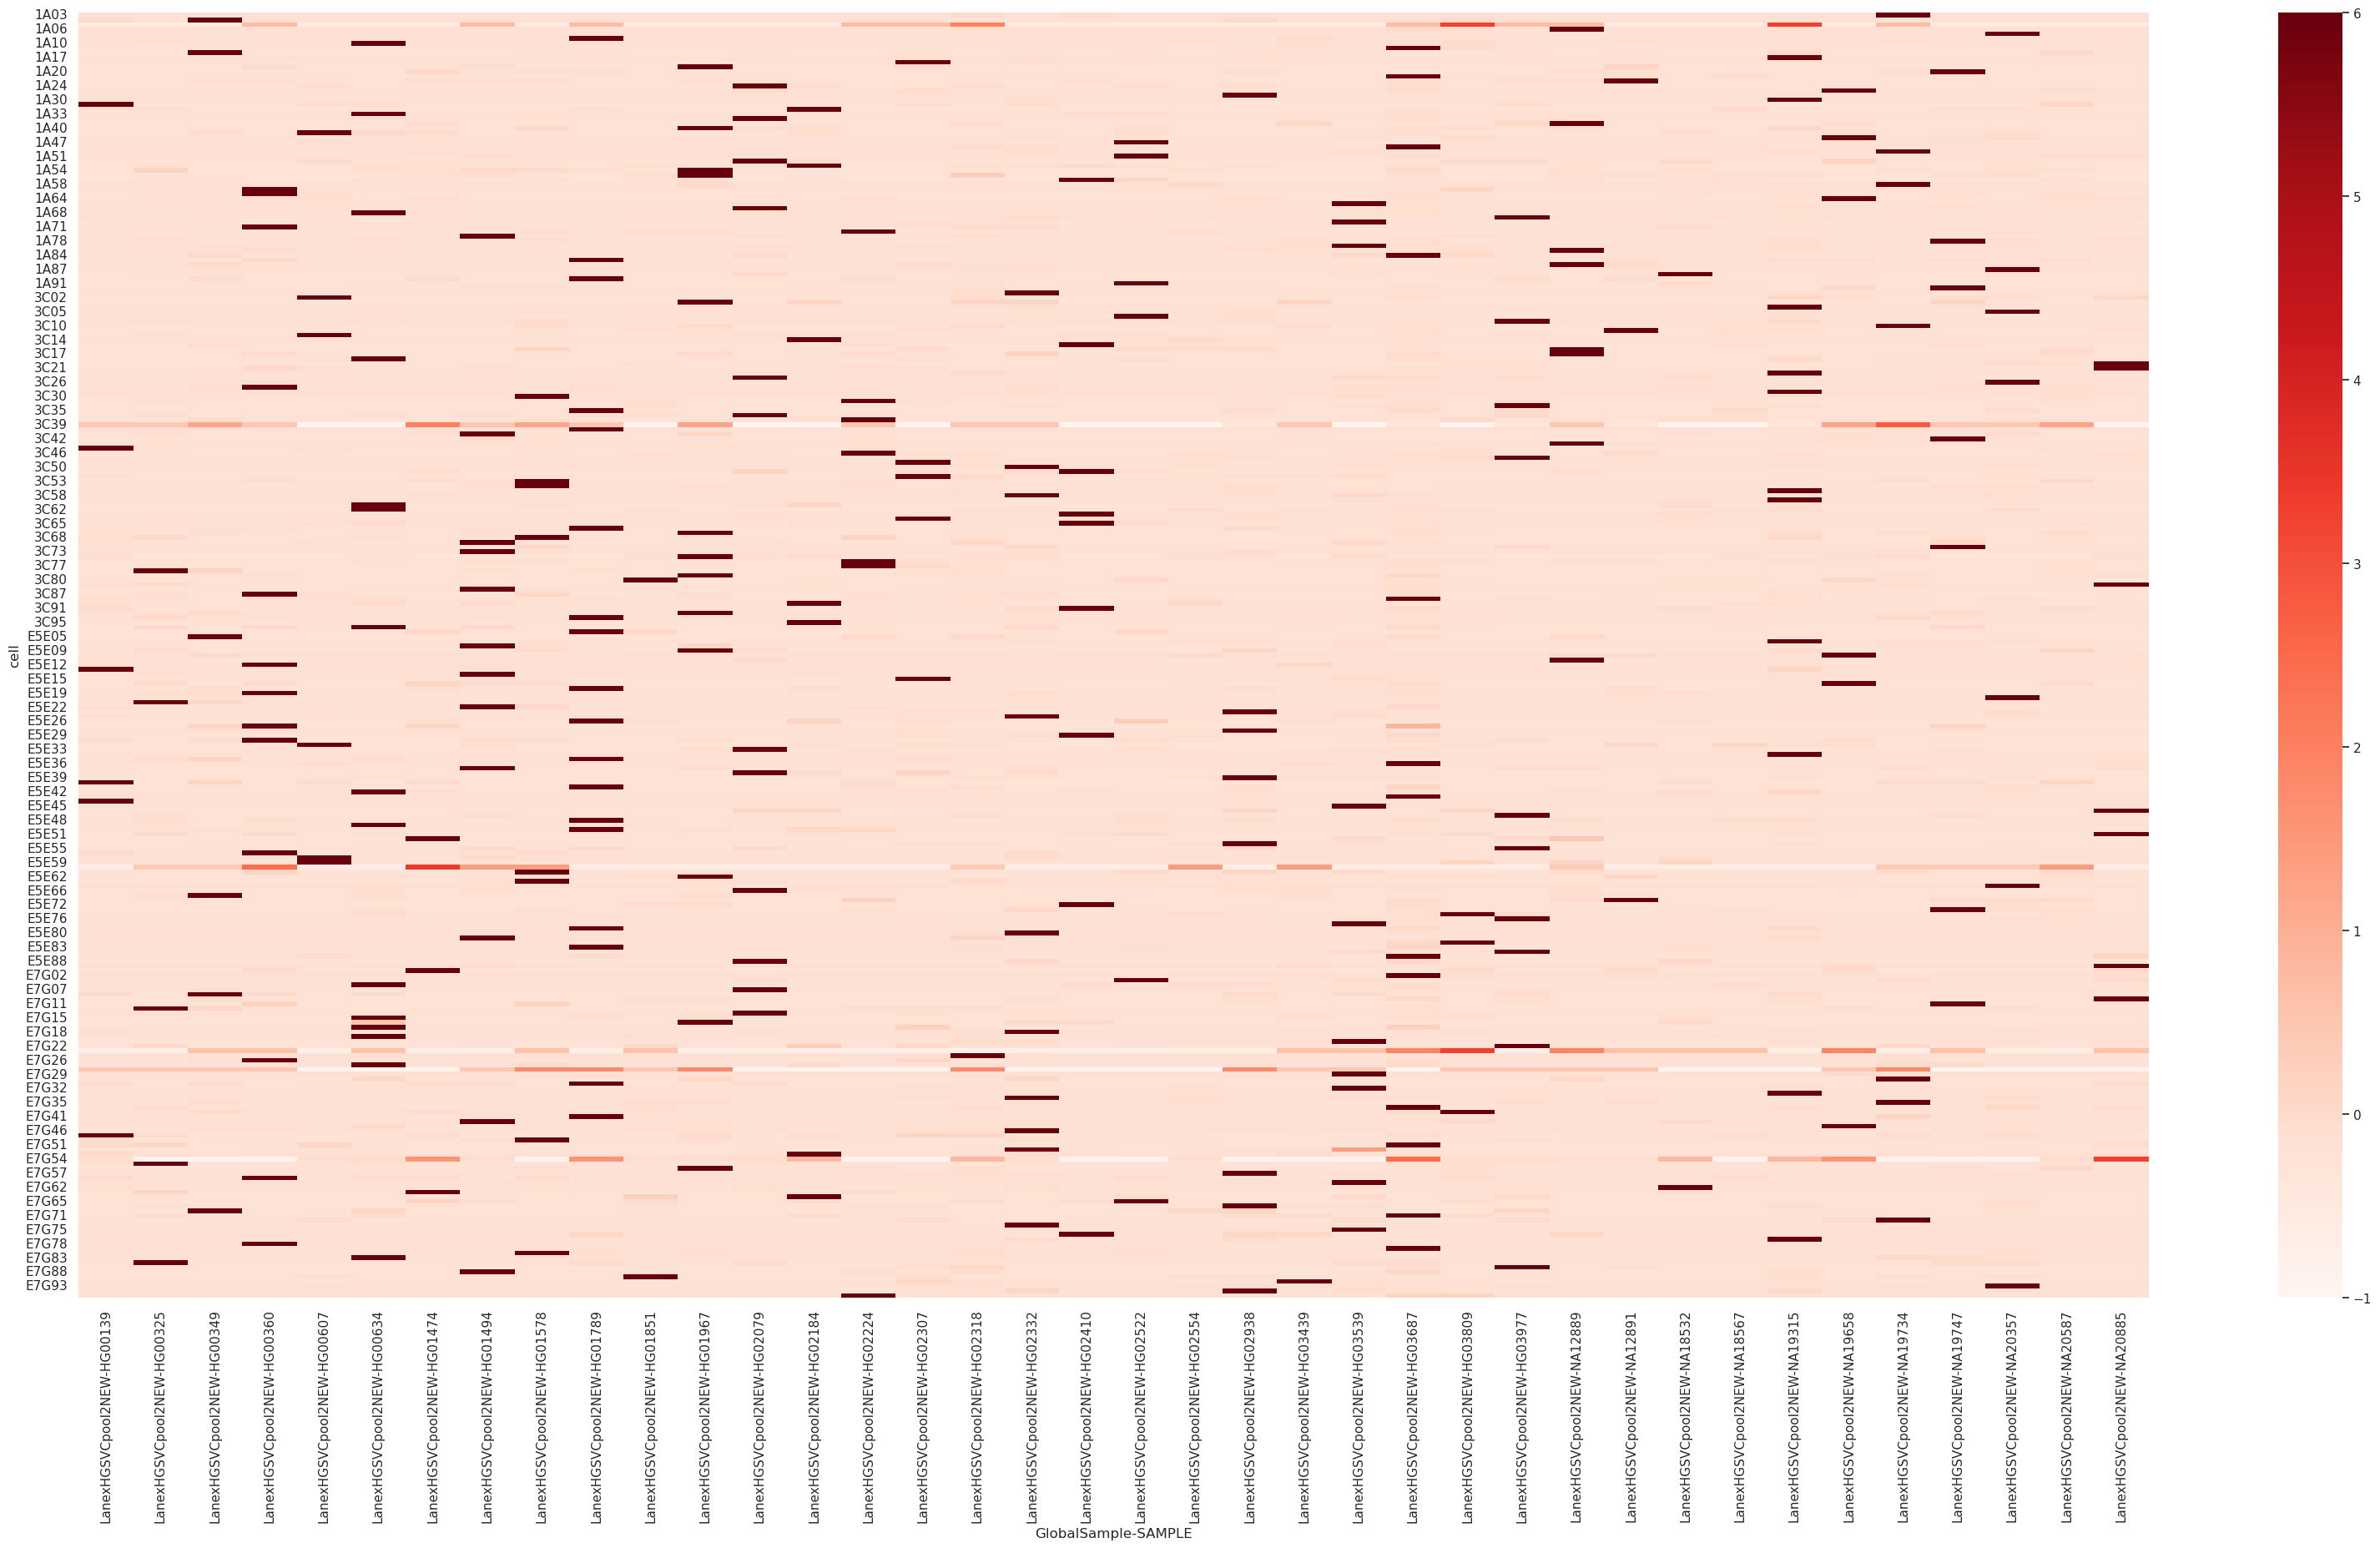

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")
plt.figure(figsize=(40,20))
ax = sns.heatmap(pivot_table_stats_zscore, cmap="Reds", vmin=-1, vmax=6)
#ax.set_title("Matched SNP nb in PseudoPool (z-score adjusted)")
#ax.set_xlabel("Sample")
#ax.set_ylabel("Cell Line")
ax.figure.savefig(f"{output_dir}/{sample_for_savedir}/heatmap_zscore_cell_per_sample.png")
ax

/g/korbel2/weber/miniconda3/envs/notebook/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/g/korbel2/weber/miniconda3/envs/notebook/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


[Text(0.5, 0, 'LanexHGSVCpool2NEW-HG00139'), Text(1.5, 0, 'LanexHGSVCpool2NEW-HG00325'), Text(2.5, 0, 'LanexHGSVCpool2NEW-HG00349'), Text(3.5, 0, 'LanexHGSVCpool2NEW-HG00360'), Text(4.5, 0, 'LanexHGSVCpool2NEW-HG00607'), Text(5.5, 0, 'LanexHGSVCpool2NEW-HG00634'), Text(6.5, 0, 'LanexHGSVCpool2NEW-HG01474'), Text(7.5, 0, 'LanexHGSVCpool2NEW-HG01494'), Text(8.5, 0, 'LanexHGSVCpool2NEW-HG01578'), Text(9.5, 0, 'LanexHGSVCpool2NEW-HG01789'), Text(10.5, 0, 'LanexHGSVCpool2NEW-HG01851'), Text(11.5, 0, 'LanexHGSVCpool2NEW-HG01967'), Text(12.5, 0, 'LanexHGSVCpool2NEW-HG02079'), Text(13.5, 0, 'LanexHGSVCpool2NEW-HG02184'), Text(14.5, 0, 'LanexHGSVCpool2NEW-HG02224'), Text(15.5, 0, 'LanexHGSVCpool2NEW-HG02307'), Text(16.5, 0, 'LanexHGSVCpool2NEW-HG02318'), Text(17.5, 0, 'LanexHGSVCpool2NEW-HG02332'), Text(18.5, 0, 'LanexHGSVCpool2NEW-HG02410'), Text(19.5, 0, 'LanexHGSVCpool2NEW-HG02522'), Text(20.5, 0, 'LanexHGSVCpool2NEW-HG02554'), Text(21.5, 0, 'LanexHGSVCpool2NEW-HG02938'), Text(22.5, 0, 'Lane

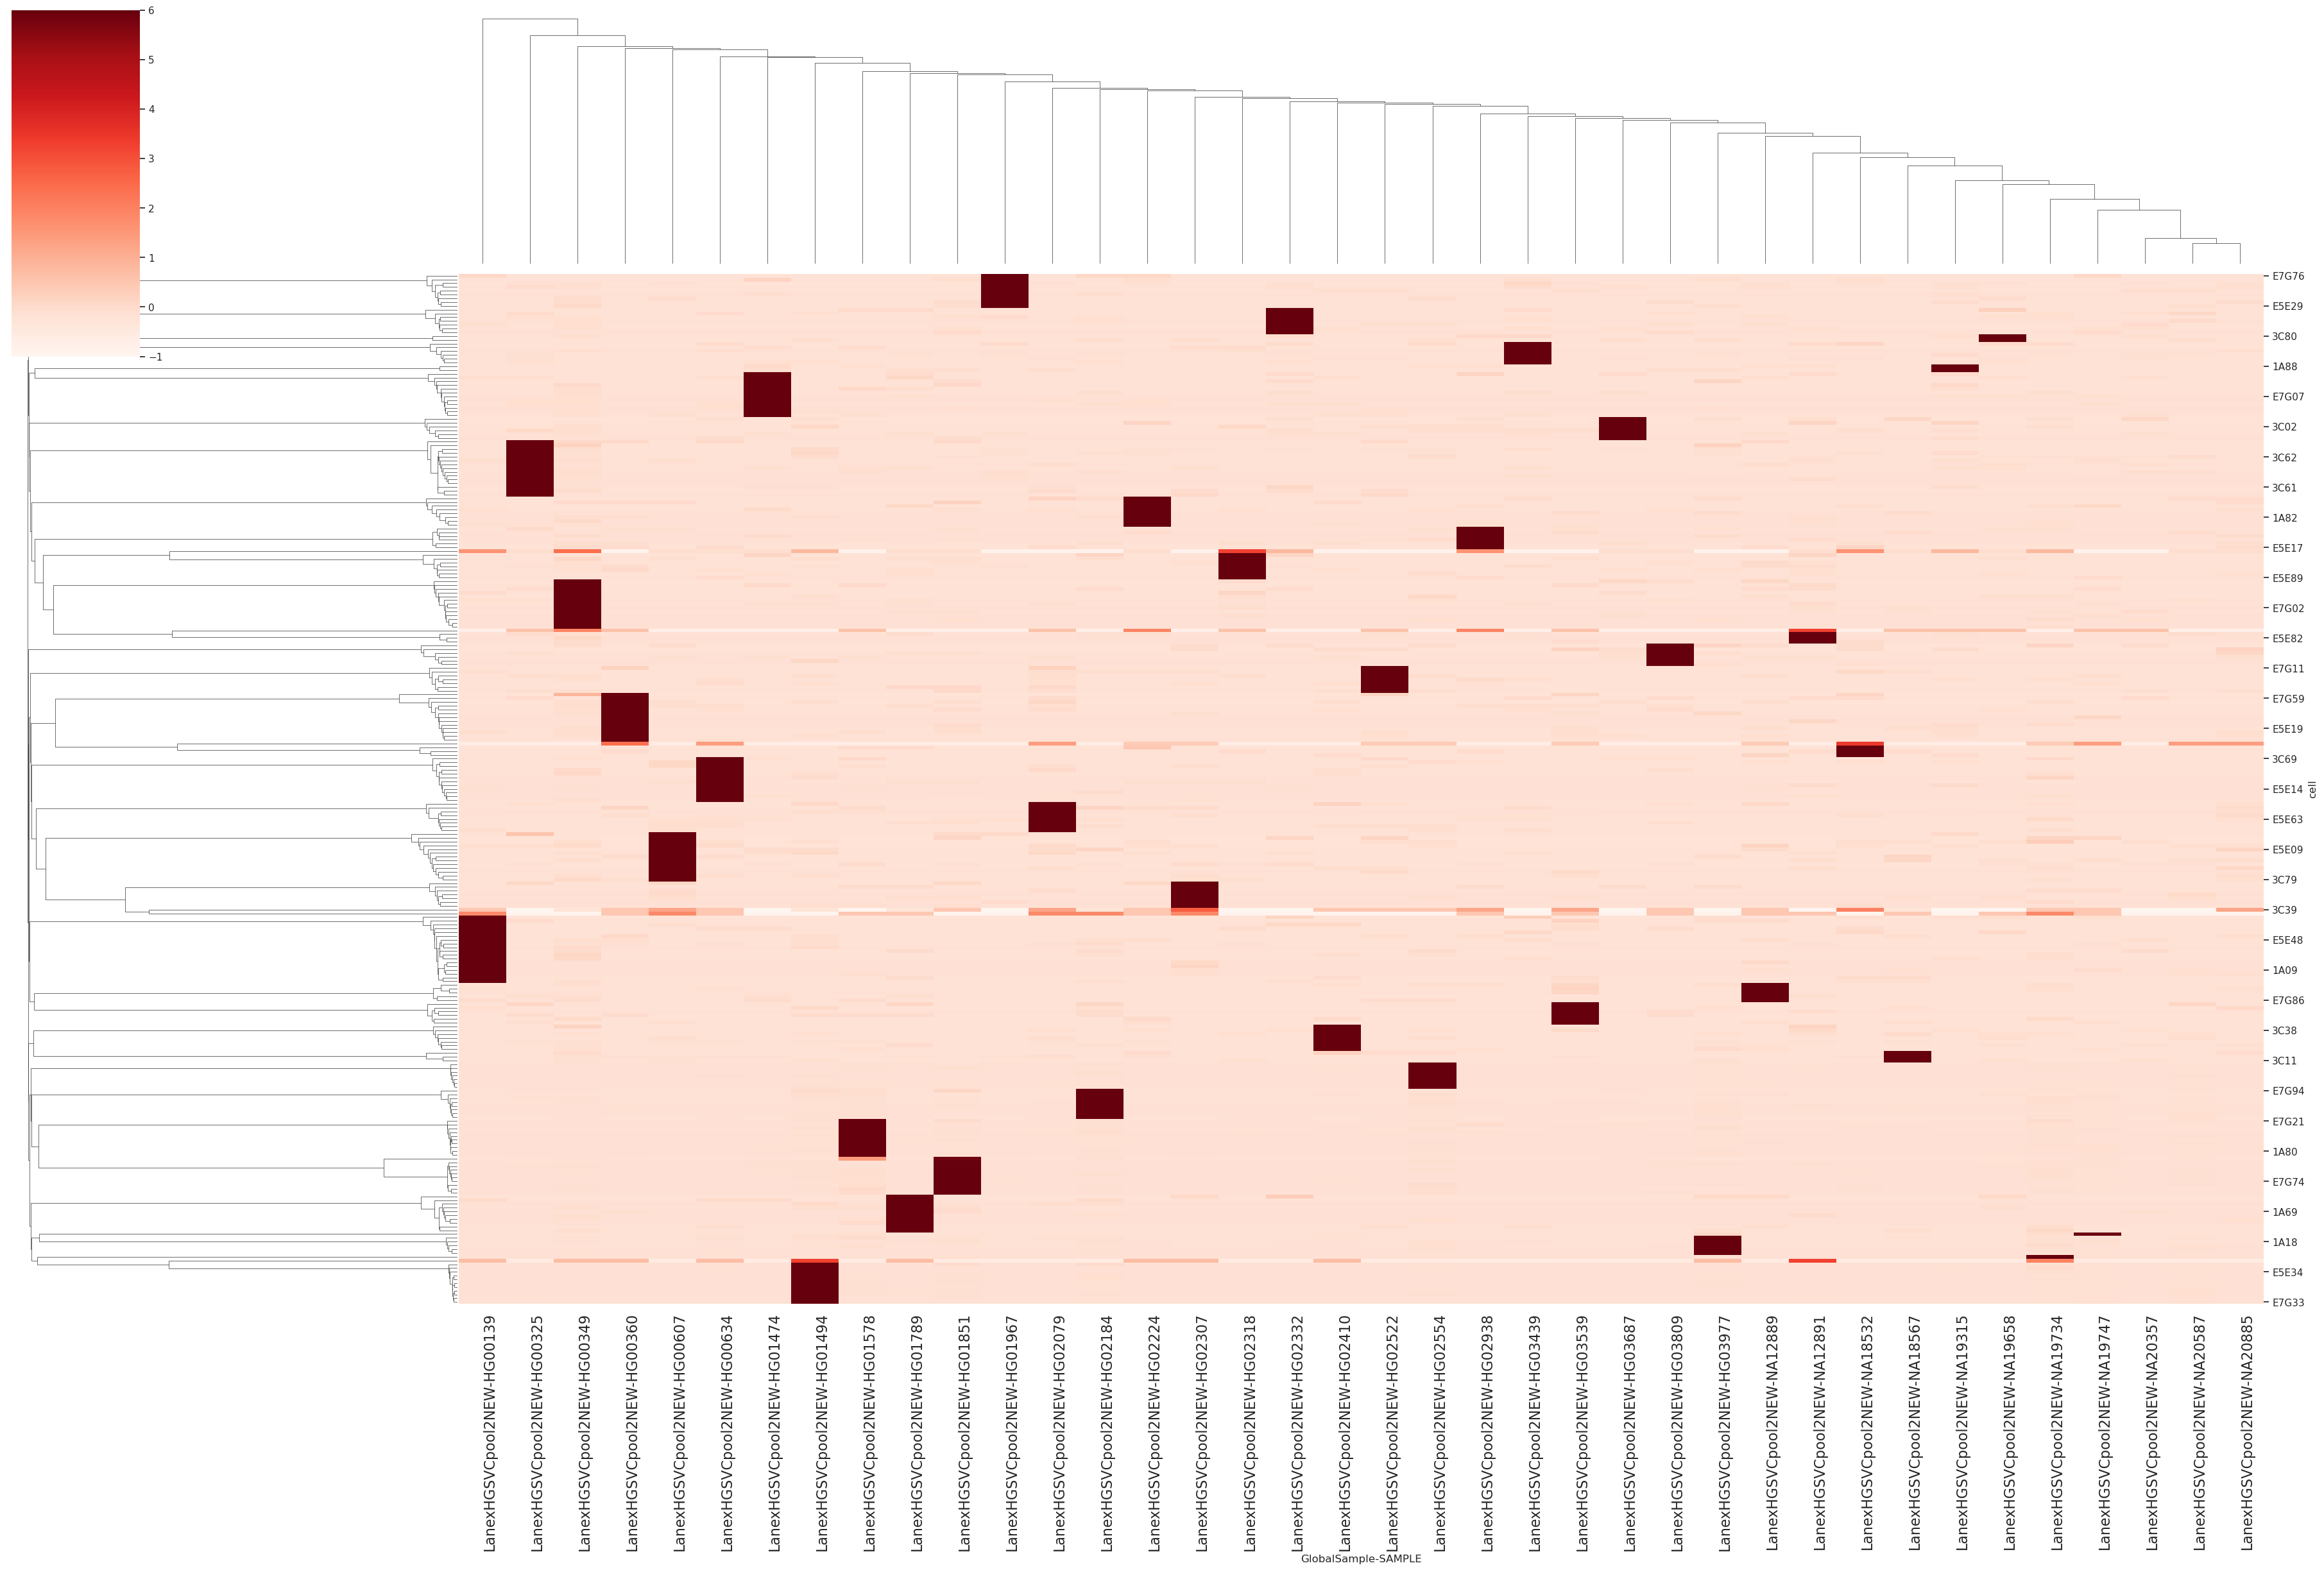

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")
# Assuming pivot_table_stats_zscore is your data

# Create the clustermap
ax = sns.clustermap(pivot_table_stats_zscore, cmap="Reds", vmin=-1, vmax=6)

# Set the size of the figure
width, height = 40, 30  # You can adjust these values as needed
ax.fig.set_size_inches(width, height)
plt.setp(ax.ax_heatmap.get_xticklabels(), rotation=90, ha="right", rotation_mode="anchor", fontsize=10)  # Adjust fontsize as needed

# Get the number of labels (assuming they are the same as the number of columns in your data)
num_labels = pivot_table_stats_zscore.shape[1]

# Set the x-tick labels manually
ax.ax_heatmap.set_xticks([x+0.5 for x in range(num_labels)])
ax.ax_heatmap.set_xticklabels(["-".join(e) for e in pivot_table_stats_zscore.columns], rotation=90,  ha='right', rotation_mode='anchor', fontsize=16 )
print(ax.ax_heatmap.get_xticklabels())

# Save the figure
output_file = f"{output_dir}/{sample}/clustermap_zscore_cell_per_sample.png"
#ax.savefig(output_file)

#ax.set_title("Matched SNP nb in PseudoPool (z-score adjusted)")
#ax.set_xlabel("Sample")
#ax.set_ylabel("Cell Line")
ax.figure.savefig(f"{output_dir}/{sample_for_savedir}/clustermap_zscore_cell_per_sample.png")
ax

In [31]:
pivot_table_stats_zscore_no_mi =  pivot_table_stats_zscore.copy()
pivot_table_stats_zscore_no_mi.columns = ["-".join(e) for e in pivot_table_stats_zscore.columns.tolist()]
pivot_table_stats_zscore_no_mi

,LanexHGSVCpool2NEW-HG00139,LanexHGSVCpool2NEW-HG00325,LanexHGSVCpool2NEW-HG00349,LanexHGSVCpool2NEW-HG00360,LanexHGSVCpool2NEW-HG00607,LanexHGSVCpool2NEW-HG00634,LanexHGSVCpool2NEW-HG01474,LanexHGSVCpool2NEW-HG01494,LanexHGSVCpool2NEW-HG01578,LanexHGSVCpool2NEW-HG01789,LanexHGSVCpool2NEW-HG01851,LanexHGSVCpool2NEW-HG01967,LanexHGSVCpool2NEW-HG02079,LanexHGSVCpool2NEW-HG02184,LanexHGSVCpool2NEW-HG02224,LanexHGSVCpool2NEW-HG02307,LanexHGSVCpool2NEW-HG02318,LanexHGSVCpool2NEW-HG02332,LanexHGSVCpool2NEW-HG02410,LanexHGSVCpool2NEW-HG02522,LanexHGSVCpool2NEW-HG02554,LanexHGSVCpool2NEW-HG02938,LanexHGSVCpool2NEW-HG03439,LanexHGSVCpool2NEW-HG03539,LanexHGSVCpool2NEW-HG03687,LanexHGSVCpool2NEW-HG03809,LanexHGSVCpool2NEW-HG03977,LanexHGSVCpool2NEW-NA12889,LanexHGSVCpool2NEW-NA12891,LanexHGSVCpool2NEW-NA18532,LanexHGSVCpool2NEW-NA18567,LanexHGSVCpool2NEW-NA19315,LanexHGSVCpool2NEW-NA19658,LanexHGSVCpool2NEW-NA19734,LanexHGSVCpool2NEW-NA19747,LanexHGSVCpool2NEW-NA20357,LanexHGSVCpool2NEW-NA20587,LanexHGSVCpool2NEW-NA20885
cell,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1A03,-0.173924,-0.173924,-0.173924,-0.173924,-0.173924,-0.173924,-0.173924,-0.173924,-0.173924,-0.173924,-0.173924,-0.173924,-0.173924,-0.173924,-0.173924,-0.173924,0.004701,-0.173924,0.004701,-0.173924,-0.173924,-0.173924,-0.173924,-0.173924,-0.173924,-0.173924,-0.173924,-0.173924,-0.173924,-0.173924,-0.173924,-0.173924,-0.173924,6.077929,-0.173924,-0.173924,-0.173924,-0.173924
1A04,0.000000,-0.178697,6.075713,-0.178697,-0.178697,-0.178697,-0.178697,-0.178697,-0.178697,-0.178697,-0.178697,-0.178697,-0.178697,-0.178697,-0.178697,-0.178697,-0.178697,-0.178697,-0.178697,-0.178697,-0.178697,0.000000,-0.178697,-0.178697,-0.178697,0.000000,-0.178697,-0.178697,-0.178697,-0.178697,-0.178697,-0.178697,-0.178697,-0.178697,-0.178697,-0.178697,-0.178697,-0.178697
1A05,-0.570162,-0.570162,-0.570162,0.704317,-0.570162,-0.570162,-0.570162,0.704317,-0.570162,0.704317,-0.570162,-0.570162,-0.570162,-0.570162,0.704317,0.704317,1.978796,-0.570162,-0.570162,-0.570162,-0.570162,-0.570162,-0.570162,-0.570162,0.704317,3.253276,0.704317,0.704317,-0.570162,-0.570162,-0.570162,3.253276,-0.570162,0.704317,-0.570162,-0.570162,-0.570162,-0.570162
1A06,-0.177894,-0.177894,-0.177894,-0.177894,-0.177894,-0.177894,-0.177894,-0.177894,-0.177894,-0.177894,-0.177894,-0.177894,-0.177894,-0.177894,-0.177894,-0.177894,-0.076999,-0.177894,-0.177894,-0.177894,-0.177894,-0.177894,-0.177894,-0.177894,0.023896,-0.076999,-0.177894,6.077608,-0.177894,-0.177894,-0.177894,-0.177894,-0.076999,-0.177894,-0.177894,-0.177894,-0.177894,-0.177894
1A08,-0.170102,-0.139897,-0.170102,-0.170102,-0.170102,-0.170102,-0.170102,-0.170102,-0.139897,-0.170102,-0.170102,-0.170102,-0.170102,-0.170102,-0.170102,-0.139897,-0.170102,-0.139897,-0.170102,-0.170102,-0.170102,-0.139897,-0.170102,-0.139897,-0.170102,-0.170102,-0.170102,-0.170102,-0.170102,-0.170102,-0.170102,-0.139897,-0.170102,-0.170102,-0.170102,6.082348,-0.170102,-0.170102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E7G90,-0.188382,-0.188382,-0.188382,-0.188382,-0.060552,-0.188382,-0.188382,-0.188382,-0.188382,-0.188382,6.075335,-0.188382,-0.188382,-0.188382,-0.188382,-0.060552,-0.188382,-0.188382,-0.188382,-0.188382,-0.060552,-0.060552,-0.188382,-0.188382,-0.188382,-0.188382,-0.188382,-0.188382,-0.188382,-0.188382,-0.188382,-0.060552,-0.188382,-0.060552,-0.188382,-0.060552,-0.188382,-0.188382
E7G91,-0.185960,-0.185960,-0.185960,-0.185960,-0.185960,-0.185960,-0.185960,-0.138534,-0.185960,-0.185960,-0.185960,-0.185960,-0.185960,-0.185960,-0.138534,0.098596,-0.043682,-0.185960,-0.138534,-0.185960,-0.185960,-0.185960,6.074262,-0.091108,-0.185960,-0.185960,-0.185960,-0.185960,-0.185960,-0.185960,-0.185960,-0.138534,-0.138534,-0.185960,-0.138534,-0.185960,-0.185960,-0.185960
E7G93,-0.175629,-0.175629,-0.175629,-0.175629,-0.175629,-0.175629,-0.175629,-0.175629,-0.175629,-0.175

In [32]:
melt_pivot_table_stats_zscore = pd.melt(
    pivot_table_stats_zscore_no_mi.reset_index(), id_vars=["cell"], value_vars=["-".join(e) for e in pivot_table_stats_zscore.columns.tolist()]
)

In [33]:
combine_ashleys_mc_stats["cell"] = combine_ashleys_mc_stats["cell"].apply(lambda r: r.split(index)[1])
combine_ashleys_mc_stats.head()

,cell,prediction,probability,sample,medbin,mapped,suppl,dupl,mapq,read2,good,pass1,nb_p,nb_r,nb_a,bam
0,1A01,0,0.0000,LanexHGSVCpool2NEW,0,7689,16,5627,876,600,570,0,0.000000,0.00000,0.0,/scratch/tweber/DATA/MC_DATA/STOCKS/2023-11-09...
1,1A02,0,0.0238,LanexHGSVCpool2NEW,12,752775,318,337228,41133,182525,191571,1,0.247709,4.35847,0.1,/scratch/tweber/DATA/MC_DATA/STOCKS/2023-11-09...
2,1A03,1,0.7255,LanexHGSVCpool2NEW,19,1239725,430,589739,72296,281049,296211,1,0.247709,6.76346,0.1,/scratch/tweber/DATA/MC_DATA/STOCKS/2023-11-09...
3,1A04,1,0.8534,LanexHGSVCpool2NEW,13,805153,472,337775,50248,203324,213334,1,0.247709,4.85162,0.1,/scratch/tweber/DATA/MC_DATA/STOCKS/2023-11-09...
4,1A05,1,0.8491,LanexHGSVCpool2NEW,12,740280,347,299233,51681,189997,199022,1,0.247709,4.52125,0.1,/scratch/tweber/DATA/MC_DATA/STOCKS/2023-11-09...


In [34]:
gb_sample_count_stats[["cell", "GlobalSample", "SAMPLE", "ID"]].rename(columns={"GlobalSample" : "Pool", "SAMPLE" : "1KG_identified_sample", "ID": "SNP_nb"}).head()

,cell,Pool,1KG_identified_sample,SNP_nb
3,1A03,LanexHGSVCpool2NEW,HG02318,1
4,1A03,LanexHGSVCpool2NEW,HG02410,1
5,1A03,LanexHGSVCpool2NEW,NA19734,35
6,1A04,LanexHGSVCpool2NEW,HG00139,1
7,1A04,LanexHGSVCpool2NEW,HG00349,35


In [35]:
gb_sample_count_stats[["cell", "GlobalSample", "SAMPLE", "ID"]].rename(columns={"GlobalSample" : "Pool", "SAMPLE" : "1KG_identified_sample", "ID": "SNP_nb"}).head()

,cell,Pool,1KG_identified_sample,SNP_nb
3,1A03,LanexHGSVCpool2NEW,HG02318,1
4,1A03,LanexHGSVCpool2NEW,HG02410,1
5,1A03,LanexHGSVCpool2NEW,NA19734,35
6,1A04,LanexHGSVCpool2NEW,HG00139,1
7,1A04,LanexHGSVCpool2NEW,HG00349,35


In [36]:
predictions_to_export = melt_pivot_table_stats_zscore.groupby(["cell"]).apply(lambda r: r.nlargest(1, 'value')).reset_index(drop=True)
predictions_to_export.loc[predictions_to_export["value"] < 5, "Trustable"] = False
predictions_to_export.loc[predictions_to_export["value"] >= 5, "Trustable"] = True
predictions_to_export[["GlobalSample", "SampleID"]] = predictions_to_export["variable"].str.split("-", expand=True)
predictions_to_export = predictions_to_export.rename(columns={"value": "z-score_value", "GlobalSample" : "Pool", "SampleID" : "1KG_identified_sample"}).drop("variable", axis=1)
predictions_to_export = pd.merge(predictions_to_export, gb_sample_count_stats[["cell", "GlobalSample", "SAMPLE", "ID"]].rename(columns={"GlobalSample" : "Pool", "SAMPLE" : "1KG_identified_sample", "ID": "SNP_nb"}), on=["cell", "Pool", "1KG_identified_sample"])
predictions_to_export = predictions_to_export[["cell", "Pool", "1KG_identified_sample", "z-score_value", "SNP_nb", "Trustable"]]
predictions_to_export.to_excel(f"{output_dir}/{sample_for_savedir}/{sample}_predictions_lite.xlsx", index=False)
predictions_to_export_lite = predictions_to_export.copy()
predictions_to_export = pd.merge(predictions_to_export, combine_ashleys_mc_stats, on="cell")
# Create tuples for MultiIndex
multiindex_columns = [('demultiplexing predictions', col) if col in predictions_to_export_lite.columns else ('metrics', col) for col in predictions_to_export.columns]
predictions_to_export_merge = predictions_to_export.copy()
# Assign MultiIndex to the columns of the merged DataFrame
predictions_to_export_merge.columns = pd.MultiIndex.from_tuples(multiindex_columns)

predictions_to_export_merge.set_index(("demultiplexing predictions", "cell")).to_excel(f"{output_dir}/{sample_for_savedir}/{sample}_predictions_with_metrics.xlsx", index=True)
predictions_to_export_merge

/tmp/ipykernel_4009051/58075166.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  predictions_to_export = melt_pivot_table_stats_zscore.groupby(["cell"]).apply(lambda r: r.nlargest(1, 'value')).reset_index(drop=True)


demultiplexing predictions                                            \
                          cell                Pool 1KG_identified_sample   
0                         1A03  LanexHGSVCpool2NEW               NA19734   
1                         1A04  LanexHGSVCpool2NEW               HG00349   
2                         1A05  LanexHGSVCpool2NEW               HG03809   
3                         1A06  LanexHGSVCpool2NEW               NA12889   
4                         1A08  LanexHGSVCpool2NEW               NA20357   
..                         ...                 ...                   ...   
268                      E7G90  LanexHGSVCpool2NEW               HG01851   
269                      E7G91  LanexHGSVCpool2NEW               HG03439   
270                      E7G93  LanexHGSVCpool2NEW               NA20357   
271                      E7G94  LanexHGSVCpool2NEW               HG02938   
272                      E7G95  LanexHGSVCpool2NEW               HG02224   

                                      metrics                                  \
    z-score_value SNP_nb Trustable prediction probability              sample   
0        6.077929     35      True          1      0.7255  LanexHGSVCpool2NEW   
1        6.075713     35      True          1      0.8534  LanexHGSVCpool2NEW   
2        3.253276      3     False          1      0.8491  LanexHGSVCpool2NEW   
3        6.077608     62      True          1      0.8890  LanexHGSVCpool2NEW   
4        6.082348    207      True          1      0.8958  LanexHGSVCpool2NEW   
..            ...    ...       ...        ...         ...                 ...   
268      6.075335     49      True          1      0.8197  LanexHGSVCpool2NEW   
269      6.074262    132      True          1      0.7426  LanexHGSVCpool2NEW   
270      6.081149    105      True          1      0.6969  LanexHGSVCpool2NEW   
271      6.071275    147      True          1      0.8808  LanexHGSVCpool2NEW   
272      6.064496     18      True          1      0.8923  LanexHGSVCpool2NEW   

                                                                          \
    medbin   mapped suppl    dupl   mapq   read2    good pass1      nb_p   
0       19  1239725   430  589739  72296  281049  296211     1  0.247709   
1       13   805153   472  337775  50248  203324  213334     1  0.247709   
2       12   740280   347  299233  51681  189997  199022     1  0.247709   
3       20  1244483   602  526929  89910  306052  320990     1  0.247709   
4       18  1134828   600  519164  78670  261452  274942     1  0.247709   
..     ...      ...   ...     ...    ...     ...     ...   ...       ...   
268     13   914487   417  430547  50748  211130  221645     1  0.247709   
269     13   824535   455  354862  54564  202134  212520     1  0.247709   
270      8   416741   195  116776  28366  132957  138447     1  0.247709   
271     13   702895   369  238297  52943  201207  210079     1  0.247709   
272     10   506203   257  143194  37322  159445  165985     1  0.247709   

                                                                      
        nb_r nb_a                                                bam  
0    6.76346  0.1  /scratch/tweber/DATA/MC_DATA/STOCKS/2023-11-09...  
1    4.85162  0.1  /scratch/tweber/DATA/MC_DATA/STOCKS/2023-11-09...  
2    4.52125  0.1  /scratch/tweber/DATA/MC_DATA/STOCKS/2023-11-09...  
3    7.28480  0.1  /scratch/tweber/DATA/MC_DATA/STOCKS/2023-11-09...  
4    6.26136  0.1  /scratch/tweber/DATA/MC_DATA/STOCKS/2023-11-09...  
..       ...  ...                                                ...  
268  5.04329  0.1  /scratch/tweber/DATA/MC_DATA/STOCKS/2023-11-09...  
269  4.82096  0.1  /scratch/tweber/DATA/MC_DATA/STOCKS/2023-11-09...  
270  3.15277  0.1  /scratch/tweber/DATA/MC_DATA/STOCKS/2023-11-09...  
271  4.76747  0.1  /scratch/tweber/DATA/MC_DATA/STOCKS/2023-11-09...  
272  3.76948  0.1  /scratch/tweber/DATA/MC_DATA/STOCKS/2023-11-09...  

[273 rows x 21 columns]

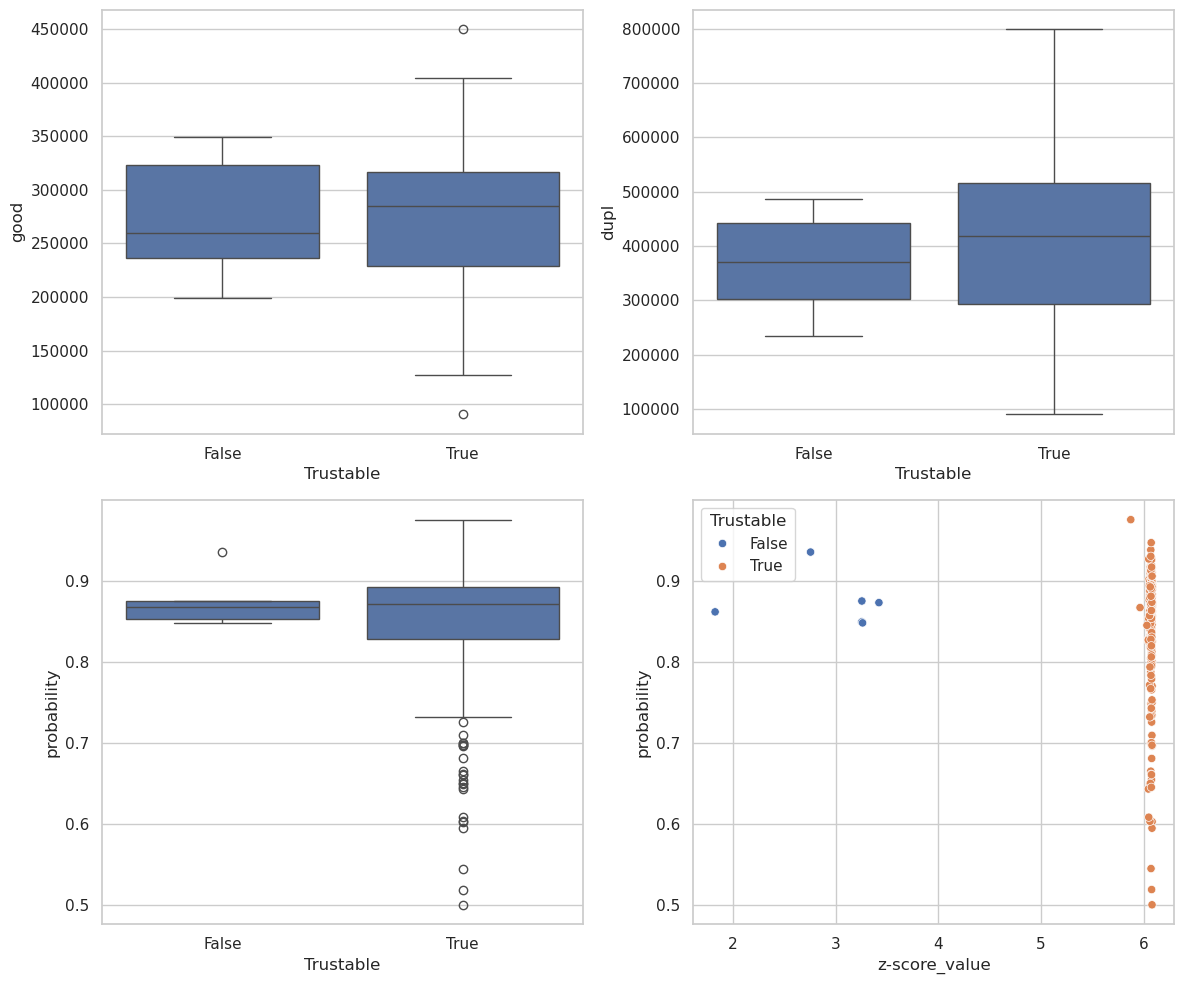

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns


# Create a figure with 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plotting
sns.boxplot(data=predictions_to_export, x="Trustable", y="good", ax=axs[0, 0])
sns.boxplot(data=predictions_to_export, x="Trustable", y="dupl", ax=axs[0, 1])
sns.boxplot(data=predictions_to_export, x="Trustable", y="probability", ax=axs[1, 0])
sns.scatterplot(data=predictions_to_export, x="z-score_value", y="probability", hue="Trustable", ax=axs[1, 1])

# Adjust layout for better presentation
plt.tight_layout()

# Save the figure
plt.savefig(f"{output_dir}/{sample_for_savedir}/combined_plots_with_metrics.png")

# Show the plot
plt.show()


In [44]:
metadata = pd.read_csv("../20130606_g1k_3202_samples_ped_population.txt", sep=" ")
metadata.head()

,FamilyID,SampleID,FatherID,MotherID,Sex,Population,Superpopulation
0,HG00096,HG00096,0,0,1,GBR,EUR
1,HG00097,HG00097,0,0,2,GBR,EUR
2,HG00099,HG00099,0,0,2,GBR,EUR
3,HG00100,HG00100,0,0,2,GBR,EUR
4,HG00101,HG00101,0,0,1,GBR,EUR


In [45]:
#color_dict

/tmp/ipykernel_4009051/1381231664.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  melt_pivot_table_stats_zscore = melt_pivot_table_stats_zscore.loc[~melt_pivot_table_stats_zscore["variable"].str.contains("Random")].groupby(["cell"]).apply(lambda r: r.nlargest(1, 'value')).reset_index(drop=True)
/tmp/ipykernel_4009051/1381231664.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=90)


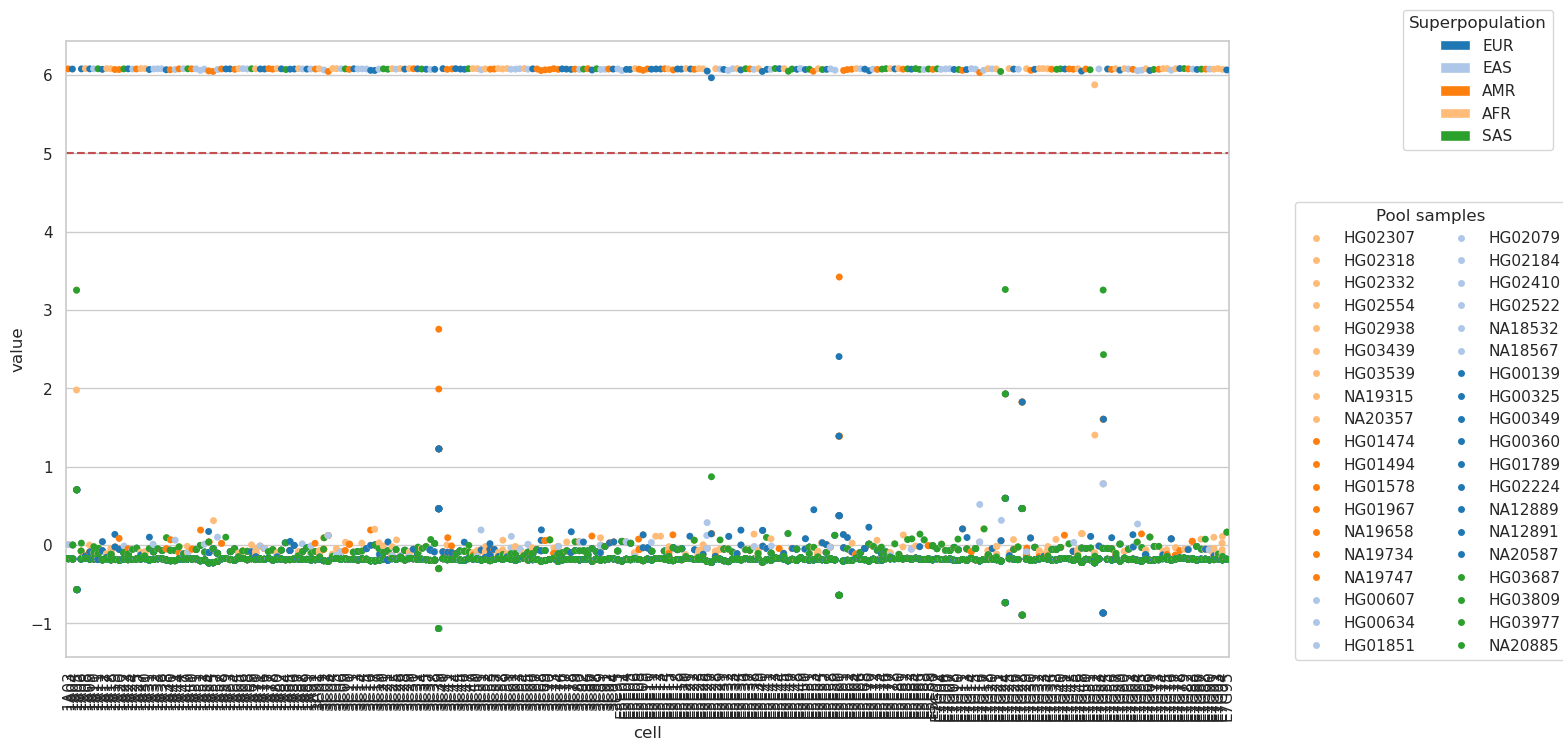

In [46]:
from matplotlib.patches import Patch


melt_pivot_table_stats_zscore = pd.melt(
    pivot_table_stats_zscore_no_mi.reset_index(), id_vars=["cell"], value_vars=["-".join(e) for e in pivot_table_stats_zscore.columns.tolist()]
)

melt_pivot_table_stats_zscore_tmp = melt_pivot_table_stats_zscore.loc[~melt_pivot_table_stats_zscore["variable"].str.contains("Random")]
melt_pivot_table_stats_zscore = melt_pivot_table_stats_zscore.loc[~melt_pivot_table_stats_zscore["variable"].str.contains("Random")].groupby(["cell"]).apply(lambda r: r.nlargest(1, 'value')).reset_index(drop=True)
# Assuming melt_pivot_table_stats_zscore is already defined and has the 'value' column.

# Calculate the numbers
total_points = len(melt_pivot_table_stats_zscore)
points_above_5 = melt_pivot_table_stats_zscore[(melt_pivot_table_stats_zscore['value'] > 5) & (~melt_pivot_table_stats_zscore["variable"].str.contains("Random"))].shape[0]
points_above_6 = melt_pivot_table_stats_zscore[(melt_pivot_table_stats_zscore['value'] > 6) & (~melt_pivot_table_stats_zscore["variable"].str.contains("Random"))].shape[0]
points_above_4 = melt_pivot_table_stats_zscore[(melt_pivot_table_stats_zscore['value'] > 4) & (~melt_pivot_table_stats_zscore["variable"].str.contains("Random"))].shape[0]
#melt_pivot_table_stats_zscore["variable"] = melt_pivot_table_stats_zscore["variable"].str.replace(sample_for_savedir.split("--")[1], "").str.replace("-", "")



melt_pivot_table_stats_zscore_tmp["SampleID"] = melt_pivot_table_stats_zscore_tmp["variable"].str.replace(sample_for_savedir.split("--")[1], "").str.replace("-", "")

melt_pivot_table_stats_zscore_tmp = pd.merge(melt_pivot_table_stats_zscore_tmp, metadata[["SampleID", "Superpopulation"]], on="SampleID")
# Generate a list of colors
colors = plt.cm.tab20.colors[:len(metadata.Superpopulation.unique().tolist())]

unique_superpopulations = melt_pivot_table_stats_zscore_tmp['Superpopulation'].unique()

# Create a color dictionary
color_dict = dict(zip(unique_superpopulations, colors))

# Add a color column to the dataframe
melt_pivot_table_stats_zscore_tmp['color'] = melt_pivot_table_stats_zscore_tmp['Superpopulation'].map(color_dict)

melt_pivot_table_stats_zscore_tmp = melt_pivot_table_stats_zscore_tmp.sort_values(by=["Superpopulation", "SampleID"])

palette_tmp = melt_pivot_table_stats_zscore_tmp[["SampleID", "color"]].drop_duplicates().set_index('SampleID')["color"].to_dict()


# Plotting
plt.figure(figsize=(15,8))
ax = sns.stripplot(data=melt_pivot_table_stats_zscore_tmp, x="cell", y="value", hue="SampleID", palette=palette_tmp)
ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=90)
plt.axhline(5, ls="--", lw=1.5, color="r")

# Add text box for the summary
textstr = '\n'.join((
    f'Total : {total_points}',
    f' > 4: {points_above_4}',
    f' > 5: {points_above_5}',
    f' > 6: {points_above_6}'))
props = dict(boxstyle='round', facecolor='grey', alpha=0.5)
#ax.text(0.5, 0.6, textstr, transform=ax.transAxes, fontsize=18,
#        verticalalignment='top', bbox=props)


# Create legend handles for superpopulations
#superpop_handles = [Patch(facecolor=color_dict[pop], label=pop) for pop in unique_superpopulations]
#superpop_legend = ax.legend(handles=superpop_handles, title="Superpopulation", bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#ax.add_artist(superpop_legend)

# Get handles and labels for SampleID
#handles, labels = ax.get_legend_handles_labels()

# Assuming there's a large number of labels, you might want to limit or organize these differently
# Here's a basic approach to re-adding the SampleID legend
# This step could be customized based on the number of samples and desired appearance
#sample_legend = ax.legend(handles[:len(unique_superpopulations)], labels[:len(unique_superpopulations)], title="SampleID", bbox_to_anchor=(1.05, 0.5), loc='center left', borderaxespad=0.)


# Create legend handles for superpopulations
#legend_handles = [Patch(facecolor=color_dict[pop], label=pop) for pop in unique_superpopulations]

# First legend for SampleID - this is automatically added by seaborn, so we get it and set again
#h, l = ax.get_legend_handles_labels()
#first_legend = ax.legend(h, l, bbox_to_anchor=(1.025, 1), loc='upper left', ncol=3, title="Sample")
#plt.gca().add_artist(first_legend)
#
## Second legend for superpopulations
#ax.legend(handles=legend_handles, bbox_to_anchor=(1.025, 0.5), loc='center left', title="Superpopulation")


#ax.set_ylim(2,6.3)
ax.figure.savefig(f"{output_dir}/{sample_for_savedir}/zscore_distribution.png")

# Step 1: Manually obtain handles and labels for the "Pool samples"
handles, labels = ax.get_legend_handles_labels()

# Step 2: Create the first legend for "Pool samples"
sample_legend = ax.legend(handles, labels, bbox_to_anchor=(1.05, 0.75), loc='upper left', ncol=2, title="Pool samples")

# Important: Add this first legend back as an artist to the axes
plt.gca().add_artist(sample_legend)

# Step 3: Create the second legend for "Superpopulation"
superpop_handles = [Patch(facecolor=color_dict[pop], label=pop) for pop in unique_superpopulations]
superpop_legend = ax.legend(handles=superpop_handles, title="Superpopulation", bbox_to_anchor=(1.15, 1.05), loc='upper left', borderaxespad=0.)

#plt.tight_layout()
plt.show()



In [47]:
mask = [col for col in pivot_table_stats_zscore.columns if col[0] != 'Random_for_sanity_check']

# Apply the mask to filter out unwanted columns
pivot_table_stats_zscore[mask].head()

GlobalSample LanexHGSVCpool2NEW                                          \
SAMPLE                  HG00139   HG00325   HG00349   HG00360   HG00607   
cell                                                                      
1A03                  -0.173924 -0.173924 -0.173924 -0.173924 -0.173924   
1A04                   0.000000 -0.178697  6.075713 -0.178697 -0.178697   
1A05                  -0.570162 -0.570162 -0.570162  0.704317 -0.570162   
1A06                  -0.177894 -0.177894 -0.177894 -0.177894 -0.177894   
1A08                  -0.170102 -0.139897 -0.170102 -0.170102 -0.170102   

GlobalSample                                                              \
SAMPLE         HG00634   HG01474   HG01494   HG01578   HG01789   HG01851   
cell                                                                       
1A03         -0.173924 -0.173924 -0.173924 -0.173924 -0.173924 -0.173924   
1A04         -0.178697 -0.178697 -0.178697 -0.178697 -0.178697 -0.178697   
1A05         -0.570162 -0.570162  0.704317 -0.570162  0.704317 -0.570162   
1A06         -0.177894 -0.177894 -0.177894 -0.177894 -0.177894 -0.177894   
1A08         -0.170102 -0.170102 -0.170102 -0.139897 -0.170102 -0.170102   

GlobalSample                                                              \
SAMPLE         HG01967   HG02079   HG02184   HG02224   HG02307   HG02318   
cell                                                                       
1A03         -0.173924 -0.173924 -0.173924 -0.173924 -0.173924  0.004701   
1A04         -0.178697 -0.178697 -0.178697 -0.178697 -0.178697 -0.178697   
1A05         -0.570162 -0.570162 -0.570162  0.704317  0.704317  1.978796   
1A06         -0.177894 -0.177894 -0.177894 -0.177894 -0.177894 -0.076999   
1A08         -0.170102 -0.170102 -0.170102 -0.170102 -0.139897 -0.170102   

GlobalSample                                                              \
SAMPLE         HG02332   HG02410   HG02522   HG02554   HG02938   HG03439   
cell                                                                       
1A03         -0.173924  0.004701 -0.173924 -0.173924 -0.173924 -0.173924   
1A04         -0.178697 -0.178697 -0.178697 -0.178697  0.000000 -0.178697   
1A05         -0.570162 -0.570162 -0.570162 -0.570162 -0.570162 -0.570162   
1A06         -0.177894 -0.177894 -0.177894 -0.177894 -0.177894 -0.177894   
1A08         -0.139897 -0.170102 -0.170102 -0.170102 -0.139897 -0.170102   

GlobalSample                                                              \
SAMPLE         HG03539   HG03687   HG03809   HG03977   NA12889   NA12891   
cell                                                                       
1A03         -0.173924 -0.173924 -0.173924 -0.173924 -0.173924 -0.173924   
1A04         -0.178697 -0.178697  0.000000 -0.178697 -0.178697 -0.178697   
1A05         -0.570162  0.704317  3.253276  0.704317  0.704317 -0.570162   
1A06         -0.177894  0.023896 -0.076999 -0.177894  6.077608 -0.177894   
1A08         -0.139897 -0.170102 -0.170102 -0.170102 -0.170102 -0.170102   

GlobalSample                                                              \
SAMPLE         NA18532   NA18567   NA19315   NA19658   NA19734   NA19747   
cell                                                                       
1A03         -0.173924 -0.173924 -0.173924 -0.173924  6.077929 -0.173924   
1A04         -0.178697 -0.178697 -0.178697 -0.178697 -0.178697 -0.178697   
1A05         -0.570162 -0.570162  3.253276 -0.570162  0.704317 -0.570162   
1A06         -0.177894 -0.177894 -0.177894 -0.076999 -0.177894 -0.177894   
1A08         -0.170102 -0.170102 -0.139897 -0.170102 -0.170102 -0.170102   

GlobalSample                                
SAMPLE         NA20357   NA20587   NA20885  
cell                                        
1A03         -0.173924 -0.173924 -0.173924  
1A04         -0.178697 -0.178697 -0.178697  
1A05         -0.570162 -0.570162 -0.570162  
1A06         -0.177894 -0.177894 -0.177894  
1A08          6.082348 -0.170102 -0.170

In [48]:
pivot_table_stats_zscore_wt_multiindex = pivot_table_stats_zscore[mask].copy()
pivot_table_stats_zscore_wt_multiindex.columns = pivot_table_stats_zscore[mask].columns.droplevel()
pivot_table_stats_zscore_wt_multiindex = pivot_table_stats_zscore_wt_multiindex.reset_index().rename({"index":"cell"}, axis=1)
pivot_table_stats_zscore_wt_multiindex.head()                   

SAMPLE,cell,HG00139,HG00325,HG00349,HG00360,HG00607,HG00634,HG01474,HG01494,HG01578,HG01789,HG01851,HG01967,HG02079,HG02184,HG02224,HG02307,HG02318,HG02332,HG02410,HG02522,HG02554,HG02938,HG03439,HG03539,HG03687,HG03809,HG03977,NA12889,NA12891,NA18532,NA18567,NA19315,NA19658,NA19734,NA19747,NA20357,NA20587,NA20885
0,1A03,-0.173924,-0.173924,-0.173924,-0.173924,-0.173924,-0.173924,-0.173924,-0.173924,-0.173924,-0.173924,-0.173924,-0.173924,-0.173924,-0.173924,-0.173924,-0.173924,0.004701,-0.173924,0.004701,-0.173924,-0.173924,-0.173924,-0.173924,-0.173924,-0.173924,-0.173924,-0.173924,-0.173924,-0.173924,-0.173924,-0.173924,-0.173924,-0.173924,6.077929,-0.173924,-0.173924,-0.173924,-0.173924
1,1A04,0.000000,-0.178697,6.075713,-0.178697,-0.178697,-0.178697,-0.178697,-0.178697,-0.178697,-0.178697,-0.178697,-0.178697,-0.178697,-0.178697,-0.178697,-0.178697,-0.178697,-0.178697,-0.178697,-0.178697,-0.178697,0.000000,-0.178697,-0.178697,-0.178697,0.000000,-0.178697,-0.178697,-0.178697,-0.178697,-0.178697,-0.178697,-0.178697,-0.178697,-0.178697,-0.178697,-0.178697,-0.178697
2,1A05,-0.570162,-0.570162,-0.570162,0.704317,-0.570162,-0.570162,-0.570162,0.704317,-0.570162,0.704317,-0.570162,-0.570162,-0.570162,-0.570162,0.704317,0.704317,1.978796,-0.570162,-0.570162,-0.570162,-0.570162,-0.570162,-0.570162,-0.570162,0.704317,3.253276,0.704317,0.704317,-0.570162,-0.570162,-0.570162,3.253276,-0.570162,0.704317,-0.570162,-0.570162,-0.570162,-0.570162
3,1A06,-0.177894,-0.177894,-0.177894,-0.177894,-0.177894,-0.177894,-0.177894,-0.177894,-0.177894,-0.177894,-0.177894,-0.177894,-0.177894,-0.177894,-0.177894,-0.177894,-0.076999,-0.177894,-0.177894,-0.177894,-0.177894,-0.177894,-0.177894,-0.177894,0.023896,-0.076999,-0.177894,6.077608,-0.177894,-0.177894,-0.177894,-0.177894,-0.076999,-0.177894,-0.177894,-0.177894,-0.177894,-0.177894
4,1A08,-0.170102,-0.139897,-0.170102,-0.170102,-0.170102,-0.170102,-0.170102,-0.170102,-0.139897,-0.170102,-0.170102,-0.170102,-0.170102,-0.170102,-0.170102,-0.139897,-0.170102,-0.139897,-0.170102,-0.170102,-0.170102,-0.139897,-0.170102,-0.139897,-0.170102,-0.170102,-0.170102,-0.170102,-0.170102,-0.170102,-0.170102,-0.139897,-0.170102,-0.170102,-0.170102,6.082348,-0.170102,-0.170102


In [49]:
#pivot_table_stats_zscore.melt()
melt_df = pd.melt(pivot_table_stats_zscore_wt_multiindex, id_vars=['cell'], value_vars=[e for e in pivot_table_stats_zscore_wt_multiindex.columns if e not in ["cell"]])
melt_df.head()

,cell,SAMPLE,value
0,1A03,HG00139,-0.173924
1,1A04,HG00139,0.000000
2,1A05,HG00139,-0.570162
3,1A06,HG00139,-0.177894
4,1A08,HG00139,-0.170102


In [50]:
def top_n_samples(group, n=3):
    return group.sort_values(by='ID', ascending=False).head(n)


# tmp_debug = gb_sample_count_stats.loc[(gb_sample_count_stats["sample"] == "GM19836x01") & (gb_sample_count_stats["prediction"] == 1)].sort_values(by=["cell", "ID"], ascending=[True, False])
pd.options.display.max_rows = None
gb_sample_count_stats
tmp_debug = gb_sample_count_stats.groupby('cell').apply(top_n_samples, n=3).reset_index(drop=True)
tmp_debug = pd.merge(tmp_debug, melt_df, on=["cell", "SAMPLE"], how="inner")
tmp_debug[["cell", "SAMPLE", "ID", "value", "probability", "good"]]
tmp_debug.head(100)
tmp_debug.to_excel(f"{output_dir}/{sample_for_savedir}/debug.xlsx", index=False)

# # Generate a color for each unique cell
# unique_cells = tmp_debug['cell'].unique()
# colors = [f"background-color: rgb({200 + i*20 % 55}, {220 - (i*20) % 55}, {200 + (i*30) % 55})" for i in range(len(unique_cells))]
# color_map = dict(zip(unique_cells, colors))

# # Apply the colors
# def apply_row_colors(row):
#     return [color_map[row['cell']]] * len(row)

# styled_df = tmp_debug.drop(["bam"], axis=1).style.apply(apply_row_colors, axis=1)

# # Display the styled DataFrame in Jupyter Notebook
# styled_df


/tmp/ipykernel_4009051/2913691368.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp_debug = gb_sample_count_stats.groupby('cell').apply(top_n_samples, n=3).reset_index(drop=True)


In [51]:
tmp_debug.SAMPLE.nunique()

38

In [52]:

# Rpy2

%load_ext rpy2.ipython 


In [53]:
metadata = pd.read_csv("../20130606_g1k_3202_samples_ped_population.txt", sep=" ")
metadata.head()

,FamilyID,SampleID,FatherID,MotherID,Sex,Population,Superpopulation
0,HG00096,HG00096,0,0,1,GBR,EUR
1,HG00097,HG00097,0,0,2,GBR,EUR
2,HG00099,HG00099,0,0,2,GBR,EUR
3,HG00100,HG00100,0,0,2,GBR,EUR
4,HG00101,HG00101,0,0,1,GBR,EUR


In [54]:
#melt_pivot_table_stats_zscore

In [55]:
melt_pivot_table_stats_zscore.head()
melt_pivot_table_stats_zscore[["GlobalSample", "SampleID"]] = melt_pivot_table_stats_zscore.variable.str.split("-", expand=True)
melt_pivot_table_stats_zscore.head()

,cell,variable,value,GlobalSample,SampleID
0,1A03,LanexHGSVCpool2NEW-NA19734,6.077929,LanexHGSVCpool2NEW,NA19734
1,1A04,LanexHGSVCpool2NEW-HG00349,6.075713,LanexHGSVCpool2NEW,HG00349
2,1A05,LanexHGSVCpool2NEW-HG03809,3.253276,LanexHGSVCpool2NEW,HG03809
3,1A06,LanexHGSVCpool2NEW-NA12889,6.077608,LanexHGSVCpool2NEW,NA12889
4,1A08,LanexHGSVCpool2NEW-NA20357,6.082348,LanexHGSVCpool2NEW,NA20357


In [93]:
merge_melt_pivot_table_stats_zscore = pd.merge(melt_pivot_table_stats_zscore, metadata, on="SampleID")
merge_melt_pivot_table_stats_zscore.head()


,cell,variable,value,GlobalSample,SampleID,FamilyID,FatherID,MotherID,Sex,Population,Superpopulation
0,1A03,LanexHGSVCpool2NEW-NA19734,6.077929,LanexHGSVCpool2NEW,NA19734,2393,0,0,2,MXL,AMR
1,1A04,LanexHGSVCpool2NEW-HG00349,6.075713,LanexHGSVCpool2NEW,HG00349,HG00349,0,0,2,FIN,EUR
2,1A05,LanexHGSVCpool2NEW-HG03809,3.253276,LanexHGSVCpool2NEW,HG03809,BD20,0,0,1,BEB,SAS
3,1A06,LanexHGSVCpool2NEW-NA12889,6.077608,LanexHGSVCpool2NEW,NA12889,1463,0,0,1,CEU,EUR
4,1A08,LanexHGSVCpool2NEW-NA20357,6.082348,LanexHGSVCpool2NEW,NA20357,2494,0,0,2,ASW,AFR


In [94]:
merge_melt_pivot_table_stats_zscore.SampleID.nunique()

35

In [58]:
import yaml
file_path = "pools_composition.yaml"
reference_sample_list = yaml.safe_load(open(file_path, "r"))

In [84]:
if not "NEW" in sample:
    corresponding_sample = [e for e in reference_sample_list if e in sample and "NEW" not in e][0]
else:
    corresponding_sample = [e for e in reference_sample_list if e in sample and "NEW" in e][0]

print(corresponding_sample)
reference_samples_with_metadata = pd.merge(
    pd.DataFrame([e.replace("GM", "NA") for e in reference_sample_list[corresponding_sample]], columns=[corresponding_sample]).melt().rename(columns={"variable":"Pool", "value":"SampleID"}),
    metadata,
    how='left'
)
reference_samples_with_metadata.head()

pool2NEW


,Pool,SampleID,FamilyID,FatherID,MotherID,Sex,Population,Superpopulation
0,pool2NEW,HG00139,HG00139,0,0,1.0,GBR,EUR
1,pool2NEW,HG00325,HG00325,0,0,1.0,FIN,EUR
2,pool2NEW,HG00349,HG00349,0,0,2.0,FIN,EUR
3,pool2NEW,HG00360,HG00360,0,0,1.0,FIN,EUR
4,pool2NEW,HG00607,SH062,0,0,1.0,CHS,EAS


{'HG01578', 'NA20357', 'HG02079', 'HG02332', 'NA19658', 'HG01967', 'HG02184', 'HG02307', 'HG02318', 'HG00360', 'HG03687', 'HG00325', 'HG00607', 'HG01474', 'NA20587', 'NA19734', 'HG00634', 'NA20885', 'HG00139', 'HG00349', 'HG03977', 'NA12889', 'NA18567', 'HG04128', 'HG01453', 'HG02410', 'HG03809', 'HG01851', 'HG02938', 'HG01789', 'NA18532', 'HG02554', 'NA12891', 'NA19315', 'HG03539', 'HG02522', 'HG01494', 'HG02224', 'NA19747', 'HG03439'}
{'HG01578', 'NA20357', 'NA19658', 'HG02332', 'HG02079', 'HG01967', 'HG02307', 'HG02184', 'HG02318', 'HG00360', 'HG03687', 'HG00325', 'HG01474', 'HG00607', 'NA19734', 'HG00634', 'NA20885', 'HG00139', 'HG00349', 'NA12889', 'HG03977', 'HG02410', 'HG03809', 'HG01851', 'HG02938', 'HG01789', 'NA18532', 'NA12891', 'NA19315', 'HG03539', 'HG02522', 'HG01494', 'HG02224', 'NA19747', 'HG03439'}
{'NA18567', 'NA20587', 'HG04128', 'HG02554', 'HG01453'}


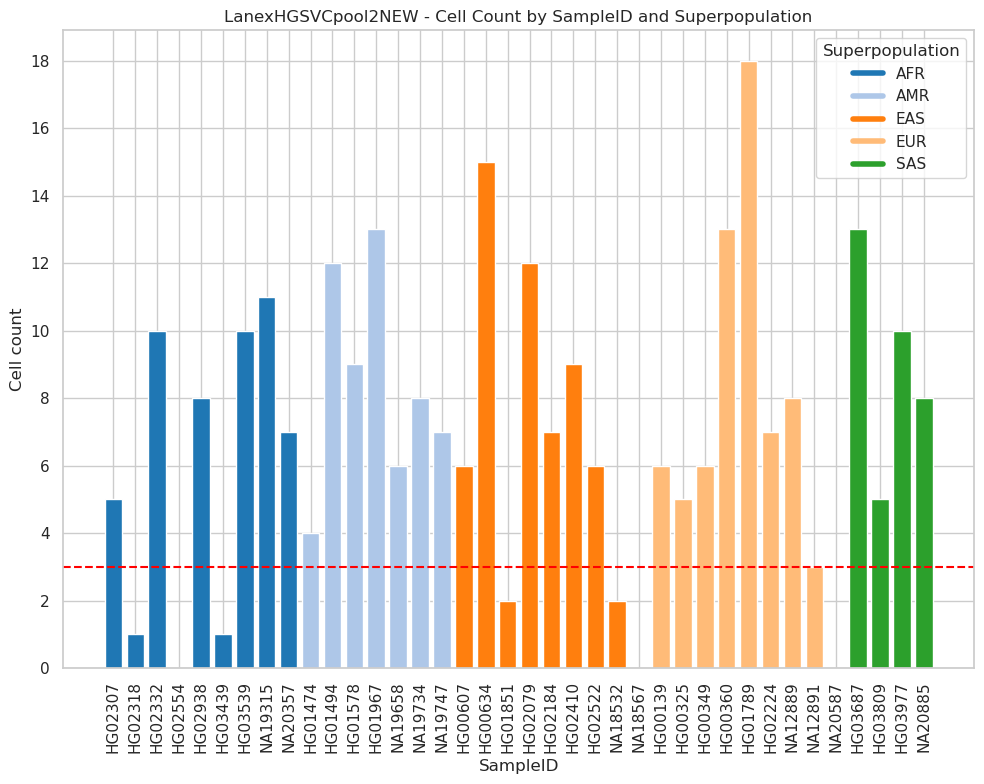

In [112]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming merge_melt_pivot_table_stats_zscore is a DataFrame that contains the data you've shown.

df = merge_melt_pivot_table_stats_zscore.groupby(["Superpopulation", "SampleID"])["cell"].nunique().reset_index()


# First, find all unique SampleIDs from reference_samples_with_metadata
unique_ref_sample_ids = reference_samples_with_metadata['SampleID'].unique()

# Identify missing SampleIDs in df
missing_sample_ids = set(unique_ref_sample_ids).difference(set(df['SampleID'].unique().tolist()))


print(set(unique_ref_sample_ids))
print(set(df['SampleID'].unique().tolist()))
print(missing_sample_ids)


# For each missing SampleID, find its Superpopulation from reference_samples_with_metadata and add a row to df
for sample_id in missing_sample_ids:
    superpop = reference_samples_with_metadata.loc[reference_samples_with_metadata['SampleID'] == sample_id, 'Superpopulation'].values[0]
    # Add a new row to df for the missing SampleID
    # Assuming 'cell' count should be 0 (or another placeholder value) for missing SampleID
    df = pd.concat([df, pd.DataFrame({'Superpopulation': [superpop], 'SampleID': [sample_id], 'cell': [0]})], ignore_index=True)
    df = df.loc[~df["SampleID"].isin(["HG01453", "HG04128"])]


# Unique superpopulations for color mapping
unique_superpopulations = df['Superpopulation'].unique()

# Generate a list of colors
colors = plt.cm.tab20.colors[:len(unique_superpopulations)]

# Create a color dictionary
color_dict = dict(zip(unique_superpopulations, colors))

# Add a color column to the dataframe
df['color'] = df['Superpopulation'].map(color_dict)

df = df.sort_values(by=["Superpopulation", "SampleID"])


df.to_csv(f"{output_dir}/{sample_for_savedir}/cell_count_by_sample_and_superpop_DATA.csv", index=False, sep="\t")

# Plot
plt.figure(figsize=(10, 8))
for _, row in df.iterrows():
    plt.bar(row['SampleID'], row['cell'], color=row['color'], label=row['Superpopulation'])

plt.axhline(3, ls="--", color="red")
# Create a custom legend
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], color=color_dict[sp], lw=4, label=sp) for sp in unique_superpopulations]
plt.legend(handles=legend_elements, title='Superpopulation')

plt.xlabel('SampleID')
plt.ylabel('Cell count')
plt.xticks(rotation=90)  # Rotate the x labels so they don't overlap
plt.title(f'{sample_for_savedir_lite} - Cell Count by SampleID and Superpopulation')

import matplotlib
locator = matplotlib.ticker.MultipleLocator(2)
plt.gca().yaxis.set_major_locator(locator)
formatter = matplotlib.ticker.StrMethodFormatter("{x:.0f}")
plt.gca().yaxis.set_major_formatter(formatter)

plt.tight_layout()  # Adjust the plot to ensure everything fits without overlap
plt.savefig(f"{output_dir}/{sample_for_savedir}/cell_count_by_sample_and_superpop.png")

plt.show()


/tmp/ipykernel_4009051/3277955254.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=reference_samples_with_metadata.Superpopulation.value_counts().reset_index().sort_values(by="Superpopulation"), x="Superpopulation", y="count", palette=palette, alpha=0.3, label='Expected Count')
/tmp/ipykernel_4009051/3277955254.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_data, x="Superpopulation", y="SampleID", palette=palette)


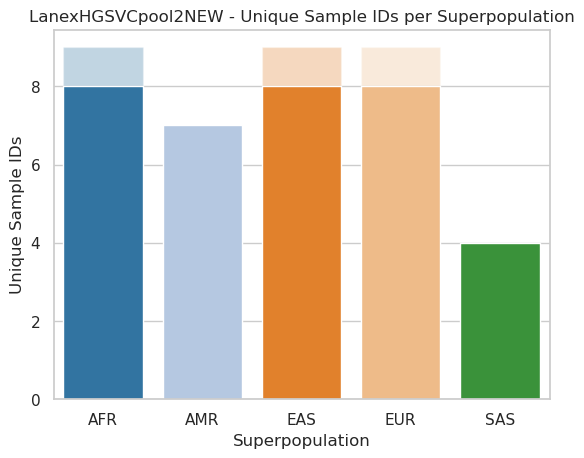

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming merge_melt_pivot_table_stats_zscore is your DataFrame
grouped_data = merge_melt_pivot_table_stats_zscore.groupby("Superpopulation")["SampleID"].nunique().reset_index()

# Unique superpopulations for color mapping
unique_superpopulations = grouped_data['Superpopulation'].unique()

# Generate a list of colors
colors = plt.cm.tab20.colors[:len(unique_superpopulations)]

# Create a color dictionary
color_dict = dict(zip(unique_superpopulations, colors))

# Create a color palette that Seaborn can use
palette = [color_dict[sp] for sp in grouped_data['Superpopulation']]


# Plot expected counts (background bars)
sns.barplot(data=reference_samples_with_metadata.Superpopulation.value_counts().reset_index().sort_values(by="Superpopulation"), x="Superpopulation", y="count", palette=palette, alpha=0.3, label='Expected Count')


df.to_csv(f"{output_dir}/{sample_for_savedir}/sample_by_superpop_recalled_DATA_background.csv", index=False, sep="\t")

sample_for_savedir_lite = sample_for_savedir.split("--")[1]
# Plot
sns.barplot(data=grouped_data, x="Superpopulation", y="SampleID", palette=palette)

plt.xlabel('Superpopulation')
plt.ylabel('Unique Sample IDs')
plt.title(f'{sample_for_savedir_lite} - Unique Sample IDs per Superpopulation')
plt.savefig(f"{output_dir}/{sample_for_savedir}/sample_by_superpop_recalled.png")

plt.show()


<Axes: xlabel='Population', ylabel='count'>

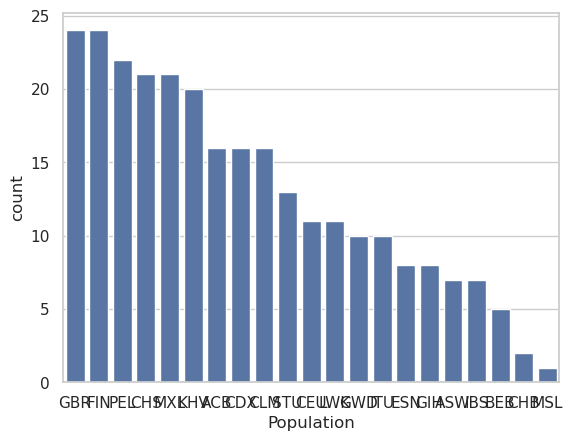

In [68]:
sns.barplot(data=merge_melt_pivot_table_stats_zscore.Population.value_counts().reset_index(), x="Population", y="count")

In [71]:
pivot_table_stats_zscore_wt_multiindex = pivot_table_stats_zscore_wt_multiindex.set_index("cell")
pivot_table_stats_zscore_wt_multiindex.head()

SAMPLE,HG00139,HG00325,HG00349,HG00360,HG00607,HG00634,HG01474,HG01494,HG01578,HG01789,HG01851,HG01967,HG02079,HG02184,HG02224,HG02307,HG02318,HG02332,HG02410,HG02522,HG02554,HG02938,HG03439,HG03539,HG03687,HG03809,HG03977,NA12889,NA12891,NA18532,NA18567,NA19315,NA19658,NA19734,NA19747,NA20357,NA20587,NA20885
cell,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1A03,-0.173924,-0.173924,-0.173924,-0.173924,-0.173924,-0.173924,-0.173924,-0.173924,-0.173924,-0.173924,-0.173924,-0.173924,-0.173924,-0.173924,-0.173924,-0.173924,0.004701,-0.173924,0.004701,-0.173924,-0.173924,-0.173924,-0.173924,-0.173924,-0.173924,-0.173924,-0.173924,-0.173924,-0.173924,-0.173924,-0.173924,-0.173924,-0.173924,6.077929,-0.173924,-0.173924,-0.173924,-0.173924
1A04,0.000000,-0.178697,6.075713,-0.178697,-0.178697,-0.178697,-0.178697,-0.178697,-0.178697,-0.178697,-0.178697,-0.178697,-0.178697,-0.178697,-0.178697,-0.178697,-0.178697,-0.178697,-0.178697,-0.178697,-0.178697,0.000000,-0.178697,-0.178697,-0.178697,0.000000,-0.178697,-0.178697,-0.178697,-0.178697,-0.178697,-0.178697,-0.178697,-0.178697,-0.178697,-0.178697,-0.178697,-0.178697
1A05,-0.570162,-0.570162,-0.570162,0.704317,-0.570162,-0.570162,-0.570162,0.704317,-0.570162,0.704317,-0.570162,-0.570162,-0.570162,-0.570162,0.704317,0.704317,1.978796,-0.570162,-0.570162,-0.570162,-0.570162,-0.570162,-0.570162,-0.570162,0.704317,3.253276,0.704317,0.704317,-0.570162,-0.570162,-0.570162,3.253276,-0.570162,0.704317,-0.570162,-0.570162,-0.570162,-0.570162
1A06,-0.177894,-0.177894,-0.177894,-0.177894,-0.177894,-0.177894,-0.177894,-0.177894,-0.177894,-0.177894,-0.177894,-0.177894,-0.177894,-0.177894,-0.177894,-0.177894,-0.076999,-0.177894,-0.177894,-0.177894,-0.177894,-0.177894,-0.177894,-0.177894,0.023896,-0.076999,-0.177894,6.077608,-0.177894,-0.177894,-0.177894,-0.177894,-0.076999,-0.177894,-0.177894,-0.177894,-0.177894,-0.177894
1A08,-0.170102,-0.139897,-0.170102,-0.170102,-0.170102,-0.170102,-0.170102,-0.170102,-0.139897,-0.170102,-0.170102,-0.170102,-0.170102,-0.170102,-0.170102,-0.139897,-0.170102,-0.139897,-0.170102,-0.170102,-0.170102,-0.139897,-0.170102,-0.139897,-0.170102,-0.170102,-0.170102,-0.170102,-0.170102,-0.170102,-0.170102,-0.139897,-0.170102,-0.170102,-0.170102,6.082348,-0.170102,-0.170102


In [72]:
%%R -i output_dir -i sample_for_savedir -i pivot_table_stats_zscore_wt_multiindex -i metadata -i ref_count -w 1800 -h 1500
library(ComplexHeatmap)
library(circlize)

set.seed(123) # for reproducibility
ordered_metadata <- metadata[match(colnames(pivot_table_stats_zscore_wt_multiindex), metadata$SampleID), ]

# Map GlobalSample to the SAMPLE in pivot_table_stats_zscore
global_sample_annotation <- ref_count[match(colnames(pivot_table_stats_zscore_wt_multiindex), ref_count$SAMPLE), "GlobalSample"]


# Hex color codes provided by you
superpopulation_colors_hex <- c(
  "AFR" = "#3274A1",
  "AMR" = "#E1812C",
  "EAS" = "#EEBB89",
  "EUR" = "#B5C8E1",
  "SAS" = "#3A923A"
)

# Assuming ordered_metadata is your metadata dataframe which has a column 'Superpopulation'

# Check if all superpopulations in your data are covered by the colors defined
if(!all(unique(ordered_metadata$Superpopulation) %in% names(superpopulation_colors_hex))) {
  stop("Not all superpopulations have a defined color")
}

# Create HeatmapAnnotation objects with the new colors
col_annotation <- HeatmapAnnotation(
  df = ordered_metadata[c("Population", "Superpopulation")],
  col = list(
    Superpopulation = superpopulation_colors_hex  # Apply the color mapping
    # Add other annotations if necessary
  ),
  GlobalSample = global_sample_annotation  # Assuming global_sample_annotation is previously defined
)

# Convert the pandas DataFrame to an R matrix
mat <- as.matrix(pivot_table_stats_zscore_wt_multiindex)
#print(head(mat))

file_path <- paste(output_dir, sample_for_savedir, "clustermap_zscore_cell_per_sample_with_annotations.png", sep="/")
png(file_path, width = 1800, height = 1500)

# Creating the heatmap
Heatmap(mat, 
        name = "z-score", 
        col = colorRamp2(c(-1, 6), c("white", "red")),
        top_annotation = col_annotation,
        cluster_rows = TRUE, 
        cluster_columns = TRUE,
        show_row_names = TRUE,
        show_column_names = TRUE,
       row_names_gp = gpar(fontsize = 8)) # Adjust fontsize as needed

#dev.off()

R[write to console]: Loading required package: grid

R[write to console]: ========================================
ComplexHeatmap version 2.18.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite either one:
- Gu, Z. Complex Heatmap Visualization. iMeta 2022.
- Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
    genomic data. Bioinformatics 2016.


The new InteractiveComplexHeatmap package can directly export static 
complex heatmaps into an interactive Shiny app with zero effort. Have a try!

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))


R[write to console]: ========================================
circlize version 0.4.15
CRAN page: https://cran.r-project.org/package=circlize
Github page: https://github.com/jokergoo/circl